
# Introduction

Afin de connaître le trafic qui s’écoule sur le réseau routier de la DIR Med, tout un système de recueil de données est mis en œuvre. Ce système de recueil de données de trafic se compose de stations permanentes (boucles de comptages) et de capteurs installés de façon permanente. Ils permettent notamment de connaître le débit (le nombre de véhicules par minutes) qui passe quotidiennement sur le réseau et la vitesse.

Dans l’ensemble de données de trafic sur les autoroutes de l’aire métropole Aix-Marseille-Provence des mesures réalisées par tranche d’une heure sur les stations de comptages ont été utilisées sur une période de 9 mois et des mesures réalisées par tranche de 6 minutes : de Janvier a Mai 2016.

Les données de comptages se composent des débits horaire (Q), taux d’occupation (To) et vitesses des véhicules passant au niveau de la station de comptage dans un sens donné, puis date et jours sur l’ensemble des jours de l’année 2016. Les données sont représentées sous forme plusieurs tables, chaque table contient les données d'un jour.

Voici le lien vers les données utilisées de Trafic/Comptage : https://github.com/Oumayma13/Comptage

ou bien

https://drive.google.com/drive/folders/1YiAVt6uI4ikUgwEuqTPmnjnSxWHvuOq9?usp=sharing

Donc ce rapport les traitements sont réalisés sur les données suivantes :

- Les données $Q$, $To$, $V$ 6 minutes sur jours ouvrés.

- Les données horaires sur l’ensemble des jours de l’année.

# Les données de comptages :
## Le recueil de données :

La présente étude concerne un réseau géré par la DIRMED (Direction Interdépartementale Des Routes Méditerranée) et La première étape consiste à recueillir les données de trafic (par intervalle de 6 minutes et une heures, par voie), par le système SIREDO (Système Informatisé de Recueil de Données), dans 6 autoroutes :

**A51** : Aix-en-Provence – Marseille, depuis l’extrémité de la partie concédée de **A51** au nord jusqu’à l’échangeur d’extrémité de A7 à Marseille au sud (autoroutes **A7**, **A51** et la RN296) .

**A50** :  Aubagne – Marseille, s’appuyant sur la partie non concédée de l’autoroute A50 et les bretelles autoroutières de contournement d’Aubagne **(A501, A502).**

**A55** : Martigues – Marseille, depuis le franchissement du viaduc deCaronte à Martigues jusqu’à la
jonction avec la bretelle
autoroutière A557 à Marseille
(autoroute A55).

Et 2 routes nationales:

**N113** : relie Marseille à Bordeaux - 660 km.

**N568** : relie la N113 à A55 - 35 km.

**L'axe A7 de Marseille à Vitrolles - 26.7 km :**
Vitrolles – Marseille, depuis l’extrémité de la partie concédée de A7 au nord jusqu’à l’autoroute A51 au sud (autoroute A7).

Les codes station SIREDO de l'autoroutes A7 sont:

M7i; M7I; M7j; M7J; M7N; M7n; M7O; M7o; M7P; M7p; M7Q; M7q; M7R; M7r; M7S; M7s; M7T; M7t; M7U; M7u; M7V; M8A; M8a; M8B; M8b; M8C; m8D; M8d; M8D; M8e; M8E; M8F; M8g; M8G; M8h; M8H; M8I; M8i; M8j; M8J; M8k; M8K; M8n; M8N; M8o; M8O; M8P; M8Q; M8R; M8S.


## Formats de données :

L’identité de la station est représentée par un code SIREDO, par lequel nous pouvons connaitre la position d’une station SIREDO.

(Lien vers la liste des stations avec les localisations: https://drive.google.com/drive/folders/1YiAVt6uI4ikUgwEuqTPmnjnSxWHvuOq9 )

Une valeur de comptage est une valeur numérique, et les fichiers de données de comptage routier comporte des informations principales présentes dans une station :

- Données de comptages : débits, vitesses, taux d’occupation:

 
**1- Débit (Q) :** Il définit la répartition des véhicules dans le temps. Le débit, en un point de repère de la route, correspond au nombre de véhicules passant en ce point pendant une période de temps donnée. Et pour caractériser le débit dans dans ces données l’indicateur utilisé est le débit de l’heure de pointe (véh /h).

**2- La vitesse (vitesse locale) :** La vitesse moyenne dans le temps est la moyenne arithmétique de vitesses instantanées de tous les véhicules passant en un point de la route, pour une durée déterminée.

**3- Taux d’occupation (To) :**  Le taux d’occupation est une proportion du temps durant laquelle un point de la chaussée est occupé par la présence des véhicules durant une période d’observation. Il s’exprime en pourcentage. Durant une période d’observation T, on désigne par $ t_{i} $ le temps de présence du véhicule i en un point de la route :
$$ To = (\sum t_{i}) / T.$$
Cette variable est aujourd’hui couramment employée dans le domaine de l’exploitation.


- Le type de données compté : débit tous véhicules, poids lourds…(classe de véhicule).

- Un identifiant permettant la localisation de la donnée (Code de station, Pr : Point de Repère).

- La date et l’heure du comptage.

- Le nombre d'accidents horaire.

- La qualité de la mesure (OK = ' ' et Douteux = '?').

Les stations SIREDO permettent de recueillir des données par classe de véhicules, et par conséquents, les données débit $Q$ et vitesses classifiées sont comptés par 6 types de véhicules, et sont indiqués dans les champs des tables par ($ Q_{i} $ avec i= 1 à 6) et ($ V_{i} $ avec i= 1 à 6).

**Remarque :** On prend dans ce qui va suivre $Q$ le trafic total $Q = Q1 + ... + Q6$, et la vitesse $ V_{2} $ de la classes 2 pour l'analyse de ces données.

<img src="tostation-ConvertImage.png">

# Organisation de données de comptages agrégées à l’heure :
## Création de la table de données de l’année 2016 :

Nous souhaitons concaténer les tables jour à fin d’avoir une table ‘dataframe’ contenant les données de toutes les autoroutes de l’aire métropole Aix-Marseille-Provence. Elles sont représentées sous forme plusieurs tables, chaque table contient les données d’un jour. Nous souhaitons concaténer les tables à fin d’avoir une table ‘dataframe’ contenant les données de toutes les autoroutes de l’aire métropole Aix-Marseille-Provence.

Dans le but de créer la table ‘table_2016’ nous allons tout d’abords regrouper les tables de jours nommées ’0i.dat’ dans une table de mois, et après on regroupe les tables mois dans table_2016. En exécutant le code suivant, on crée la table des données du mois de janvier, sans oublier d’indiquer le chemin des données sur la machine après les avoir télécharger.

In [ ]:
#Verifier le chemin et importer les packages.
pwd
#Chemin
cd &path

In [1]:
#Charger les biblio
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import string
from subprocess import check_output
import seaborn as sns
from pylab import *
%matplotlib inline
sns.set()

In [ ]:
#Creation de la table du mois janvier 2016.
table_01_16 = pd.concat([pd.read_csv('01.dat', header=None, sep=';', engine='python'),
                pd.read_csv('02.dat', header=None, sep=';', engine='python'),
                pd.read_csv('03.dat', header=None, sep=';', engine='python'),
                pd.read_csv('04.dat', header=None, sep=';', engine='python'),
                pd.read_csv('05.dat', header=None, sep=';', engine='python'),
                pd.read_csv('06.dat', header=None, sep=';', engine='python'),
                pd.read_csv('07.dat', header=None, sep=';', engine='python'),
                pd.read_csv('08.dat', header=None, sep=';', engine='python'),
                pd.read_csv('09.dat', header=None, sep=';', engine='python'),
                pd.read_csv('10.dat', header=None, sep=';', engine='python'),
                pd.read_csv('11.dat', header=None, sep=';', engine='python'),
                pd.read_csv('12.dat', header=None, sep=';', engine='python'),
                pd.read_csv('13.dat', header=None, sep=';', engine='python'),
                pd.read_csv('14.dat', header=None, sep=';', engine='python'),
                pd.read_csv('15.dat', header=None, sep=';', engine='python'),
                pd.read_csv('16.dat', header=None, sep=';', engine='python'),
                pd.read_csv('17.dat', header=None, sep=';', engine='python'),
                pd.read_csv('18.dat', header=None, sep=';', engine='python'),
                pd.read_csv('19.dat', header=None, sep=';', engine='python'),
                pd.read_csv('20.dat', header=None, sep=';', engine='python'),
                pd.read_csv('21.dat', header=None, sep=';', engine='python'),
                pd.read_csv('22.dat', header=None, sep=';', engine='python'),
                pd.read_csv('23.dat', header=None, sep=';', engine='python'),
                pd.read_csv('24.dat', header=None, sep=';', engine='python'),
                pd.read_csv('25.dat', header=None, sep=';', engine='python'),
                pd.read_csv('26.dat', header=None, sep=';', engine='python'),
                pd.read_csv('27.dat', header=None, sep=';', engine='python'),
                pd.read_csv('28.dat', header=None, sep=';', engine='python'),
                pd.read_csv('29.dat', header=None, sep=';', engine='python'),
                pd.read_csv('30.dat', header=None, sep=';', engine='python'),
                pd.read_csv('31.dat', header=None, sep=';', engine='python')]) 
#transformer la table en dataframe
table_01_2016 = pd.DataFrame(table_01_16)
#Exporter la table
table_01_2016.to_csv('table_01_2016.csv', index = False, encoding = 'utf-8')

A fin de créer la table ‘table_2016’ nous allons tout d’abords regrouper les tables de jours nommées ’0i.dat’ dans une table de mois, et après on regroupe les tables mois dans table_2016, en effectuant le code suivant :
On refait le code ci-dessus pour toutes les autres tables, jusqu'au mois d'septembre.
Voici le lien vers les tables de données de janvier jusqu'à septembre 2016 : 
https://drive.google.com/drive/folders/1Z3MFMvPBtjWzgTjDra2VNLwL7u262uYx

En appliquant le code suivant, on obtient la table ‘table_2016’ :

In [ ]:
table_2016 = pd.concat([table_01_2016, table_02_2016, table_03_2016, table_04_2016, table_05_2016, table_06_2016,
                       table_07_2016, table_08_2016, table_09_2016])

 ###### Remarque : 
Vous trouverez la table des données dans le même lien au-dessus.  

Après avoir importer la table, nous pouvons renommer les colonnes facilement sur Excel et supprimer les colonnes vides comme on supprime aussi les vitesses et on garde que la vitesse de la 2eme classe de véhicules car elle contient le plus de valeurs. 


In [119]:
#Importation de la table
table_2016 = pd.read_csv("table_2016.csv", sep = ';')
#Lire la table en dataframe
table_2016 = pd.DataFrame(table_2016)
table_2016.head()

,rgs,pr,m,js,jjmmaa,hhmm,Q1,Q2,Q3,Q4,Q5,Q6,Vitesse,To,Qualite
0,101#M1a,0,430,Ve,01/01/2016,00:00,11,403,5,0.0,0.0,2.0,92.0,1.0,?
1,102#M1b,1,9,Ve,01/01/2016,00:00,51,778,4,0.0,0.0,2.0,92.0,3.0,
2,103#M1c,1,508,Ve,01/01/2016,00:00,0,0,0,0.0,0.0,0.0,0.0,0.0,
3,104#M1d,2,30,Ve,01/01/2016,00:00,27,759,3,0.0,0.0,3.0,92.0,3.0,
4,105#M1e,2,462,Ve,01/01/2016,00:00,41,794,4,0.0,0.0,3.0,91.0,3.0,


In [120]:
# J'ai copié la table pour la modifier et garder la table initiale
dff = table_2016.copy()
#La colonne débit Q contient le débit toutes les classes de véhicules
dff['Q'] = table_2016['Q1'] + table_2016['Q2'] +table_2016['Q3'] +table_2016['Q4'] +table_2016['Q5'] +table_2016['Q6'] 
#Supprimer les colonnes Qi
lst = ['Q1','Q2','Q3','Q4','Q5','Q6']
dff = dff.drop(lst, 1,errors='ignore')
dff.head()

,rgs,pr,m,js,jjmmaa,hhmm,Vitesse,To,Qualite,Q
0,101#M1a,0,430,Ve,01/01/2016,00:00,92.0,1.0,?,421.0
1,102#M1b,1,9,Ve,01/01/2016,00:00,92.0,3.0,,835.0
2,103#M1c,1,508,Ve,01/01/2016,00:00,0.0,0.0,,0.0
3,104#M1d,2,30,Ve,01/01/2016,00:00,92.0,3.0,,792.0
4,105#M1e,2,462,Ve,01/01/2016,00:00,91.0,3.0,,842.0


In [121]:
rgs = dff.rgs
#On sépare la colonne rgs pour pouvoir lire le code de la station
#Cela aide a utiliser la fonction startswith
dff['A'], dff['Code'] = dff['rgs'].str.split('#', 1).str
dff.head()

,rgs,pr,m,js,jjmmaa,hhmm,Vitesse,To,Qualite,Q,A,Code
0,101#M1a,0,430,Ve,01/01/2016,00:00,92.0,1.0,?,421.0,101,M1a
1,102#M1b,1,9,Ve,01/01/2016,00:00,92.0,3.0,,835.0,102,M1b
2,103#M1c,1,508,Ve,01/01/2016,00:00,0.0,0.0,,0.0,103,M1c
3,104#M1d,2,30,Ve,01/01/2016,00:00,92.0,3.0,,792.0,104,M1d
4,105#M1e,2,462,Ve,01/01/2016,00:00,91.0,3.0,,842.0,105,M1e


### Les données de trafic sur l'autoroute A7 :
Le code de toutes les stations dans l'autoroute A7 commence par 'M7' et 'M8', donc nous gardons dans la table 'df' ques les stations de A7.

In [122]:
#Selectionner les codes qui commence par M7 et M8
df1 = dff[dff['Code'].str.startswith('M8')]
df2 = dff[dff['Code'].str.startswith('M7')]
#Concatener les deux tables
df3 = pd.concat([df2,df1],axis = 0,ignore_index = True)
df3.head()

,rgs,pr,m,js,jjmmaa,hhmm,Vitesse,To,Qualite,Q,A,Code
0,709#M7i,264,687,Ve,01/01/2016,00:00,98.0,2.0,,487.0,709,M7i
1,710#M7j,265,320,Ve,01/01/2016,00:00,96.0,1.0,,277.0,710,M7j
2,713#M7n,267,230,Ve,01/01/2016,00:00,0.0,0.0,,0.0,713,M7n
3,715#M7o,267,861,Ve,01/01/2016,00:00,110.0,1.0,,327.0,715,M7o
4,716#M7p,268,288,Ve,01/01/2016,00:00,0.0,0.0,,0.0,716,M7p


Voici le lien vers la table A7 sous le nom de table_A7_2016 : https://drive.google.com/drive/folders/1Z3MFMvPBtjWzgTjDra2VNLwL7u262uYx

Pour exporter la table il suffit d'exécuter la commande suivante :

In [6]:
#Exporter la table
df.to_csv('table_A7_2016.csv', index = False, encoding = 'utf-8')

NameError: name 'df' is not defined

# Qualification des données

Cette étape consiste a évaluer la qualité des données . Chaque mesures élémentaire du trafic (Q,V,To) mesurée par des boucles électromagnétique est analysée pour détecter les incohérences pouvant caractériser un éventuel dysfonctionnement de la chaine de recueil.
La qualité de ces données est évaluée par application de tests élémentaires permettant de vérifier la cohérence des 3 données mesurées pour chaque point de mesures. Il s’agit des tests suivants :
- Données manquantes. 
- Sur-comptage/ Sur-vitesse.
- Q/V/To nul.
- Débit et Vitesse incompatibles.
- Débit et TO incompatibles.

Nous allons faire une qualification des données pour chaque point de mesures qui représente une station.

## Les données manquantes  :
 Les données manquantes correspondent aux données non présentes ou « vides » ou bien les données marquées d’un indice de qualité mauvais, c’est à dire les données dont la mesure qualité indique ‘ ? ’. 

##### Remarque :
Dès qu’une des 3 valeurs (Q, V ou TO) est manquante, la mesure complète est considérée manquante, donc on élimine toute la mesure.

On cherche les valeurs manquantes dans l'ensemble des données d'A7. La commande suivante montre qu'elles ne contiennent aucune donnée manquante, et par conséquent il n y en a aucune dans les points de mesures concernés.

In [7]:
df3.isnull().any()

rgs        False
pr         False
m          False
js         False
jjmmaa     False
hhmm       False
Vitesse    False
To         False
Qualite    False
Q          False
A          False
Code       False
dtype: bool

## Valeur aberrante et nulle :
**Valeurs extrêmes :**

Une valeur aberrante est une valeur qui s'écarte fortement des valeurs des autres observations, anormalement faible ou élevée. Les valeurs aberrantes peuvent avoir un effet disproportionné sur les résultats statistiques, tels que la moyenne, ce qui peut conduire à des interprétations trompeuses. Et c’est souvent à cause des erreurs de saisie de données ou bien un problème lié au procédé.
la couverture en terme de capteurs est rarement totale sur le réseau et les mesures peuvent comporter des erreurs ou être indisponibles dans le cas de panne de capteur. C’est la raison pour laquelle des méthodes de qualiﬁcation (=identiﬁcation) des données aberrantes et de reconstitution des données manquantes sont développées, ces méthodes donnent comme résultat les tests suivants:
- Le test de sur-comptage est effectué en comparant chaque débit mesuré à un seuil de débit : à priori 6000 véh./heure.

- Le test de sur-vitesse, est effectué en comparant chaque vitesse mesurée à une vitesse limite : à priori 160 km/h.

- Le test du taux d'occupation $To$, est effectuée en identifiant les valeurs nulles ou supérieures à la 100%.

**Valeurs nulles:**

Lorsque le débit ou la vitesse est nul ou encore le To la voie est vide. Donc une heure sans donnée, revient à dire que la voie est vide cette heure ci.

**Utilisation de graphiques pour identifier des valeurs aberrantes :**
 
Nous pouvons aussi trouver les derniers résultats des sur-comptage et sur-vitesse en identifiant les valeurs aberrantes par des graphes :
Sur les nuages de points, les points très éloignés des autres sont de possibles valeurs aberrantes. 
En effectuant la commande suivant, on obtient un graphe de nuage :

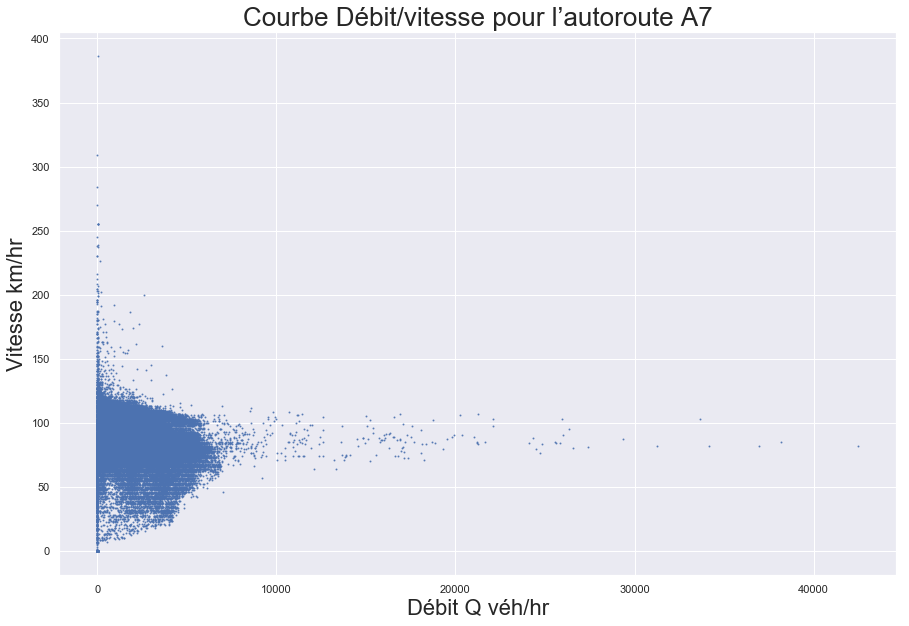

In [48]:
fig = plt.figure(figsize=(15, 10))
b = sns.regplot(x= df3['Q'], y=df3['Vitesse'], scatter_kws={'s':1}, fit_reg=False)
b.set_xlabel("Débit Q véh/hr",fontsize=22)
b.set_ylabel("Vitesse km/hr",fontsize=22)
plt.title('Courbe Débit/vitesse pour l’autoroute A7',fontsize = 26)
fig.savefig('figure5.png')

Ce nuage de points met en évidence des valeurs aberrantes, les points très éloignés des autres sont supérieur 
que 6000 pour le débit et 150 pour la vitesse. Ce qui confirme /*le résultat dernier*/.
 
En général, les valeurs aberrantes sont plus faciles à repérer sur une boîte à moustaches. Elles sont des valeurs de données très éloignées des autres valeurs de données, et peuvent avoir une incidence importante sur nos résultats.


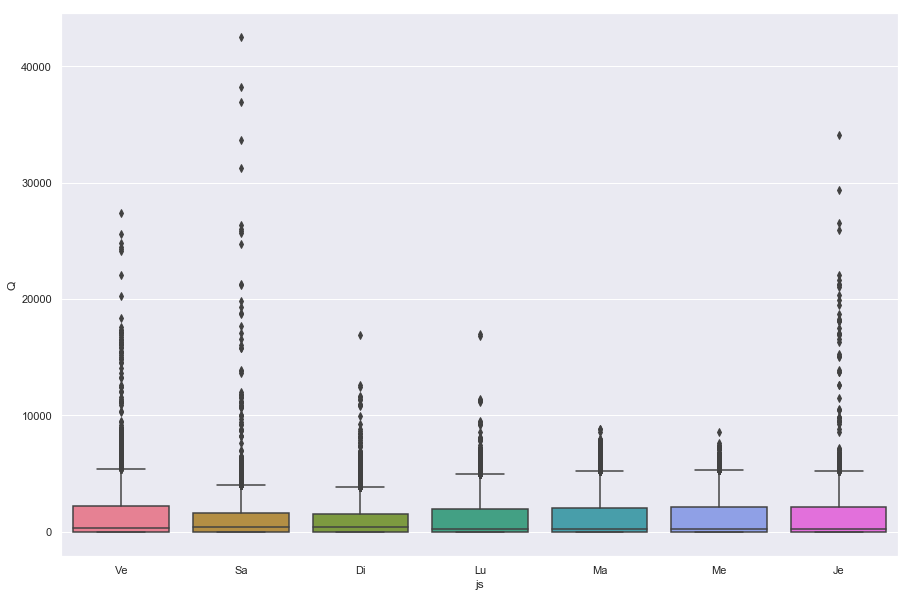

In [17]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x= 'js' , y='Q', data = df3, palette = 'husl')
fig.savefig('figure6.png')

 Pour la suite nous allons traiter les données aberrantes de chaques stations, et pour cela on commence par les identifier.

**Débit et Vitesse incompatibles :**

Le test débit / Vitesse incompatibles est effectué en recensant les cas où :
- $Q > 0$ et $V = 0$, ou bien
- $Q = 0$ et $V > 0$.

**Débit et $To$ incompatibles :**

Le test débit $To$ incompatibles est effectué en recensant les cas où :
- $Q >$ seuil_min et $To$ = 0%.
Avec seuil_min = 35 véh./6minutes/voie = 350 véh./heure/voie.

In [123]:
#Identifier les donnees de chaque stations
grouped = df3.groupby('Code')
#for name,group in grouped:
    #print (name)
    #name = grouped.get_group('name')
    #print (group)

In [21]:
#La fonction utilisée pour calculer les pourcentages des donnees aberrantes 
def PRC(b):
    l = len(M7i) - len(b)
    return (l*100)/ len(M7i)

### Point de mesures : 813#M8m

In [8]:
#Table de donnees de la station M8m
M8m = grouped.get_group('M8m')
M8m.head()

,rgs,pr,m,js,jjmmaa,hhmm,Vitesse,To,Qualite,Q,A,Code
94491,813#M8m,278,360,Ve,01/01/2016,00:00,0.0,0.0,,0.0,813,M8m
94528,813#M8m,278,360,Ve,01/01/2016,01:00,0.0,0.0,,0.0,813,M8m
94565,813#M8m,278,360,Ve,01/01/2016,02:00,0.0,0.0,,0.0,813,M8m
94602,813#M8m,278,360,Ve,01/01/2016,03:00,0.0,0.0,,0.0,813,M8m
94639,813#M8m,278,360,Ve,01/01/2016,04:00,0.0,0.0,,0.0,813,M8m


Donc la station M8m ne contient que des valeurs nulles dans les champs: Vitesse, Q, To.
Dans ce chapitre on prendra comme exemple les deux points de mesures suivants : 709#M7i et 811#M8k.
    
### Point de mesures : 709#M7i

- Coordonnées: 587097.071071 ; 5369193.042693
- Axe: A7
- Sens: Marseille -> Lyon
- PR: 264+687
- Long: représentée 5,262 km
- Nombre de voies: 2
- Nombre de capteurs: 3
- Largeur par voie: 3,5m
- Présence BAU :oui.

**Valeurs extrêmes et nulles :**

Pour commencer nous allons tout d’abord identifier les données de chaque station, puis récupérer et compter les données qui vérifient :  

•	Débit horaire $\leq$ 6000 véh/hr.

•	Vitesse horaire $\leq$ 160 km/hr.

•	To $\leq$ 100%.

In [125]:
#Table de donnees de la station M7i
M7i = grouped.get_group('M7i')
#transformer la table en dataframe
M7i = pd.DataFrame(M7i)
M7i.describe()

,pr,m,Vitesse,To,Q
count,4499.0,4499.0,4499.000000,4499.000000,4499.000000
mean,264.0,687.0,83.530562,12.369638,1943.087575
std,0.0,0.0,21.857091,12.463145,1458.774696
min,264.0,687.0,0.000000,0.000000,0.000000
25%,264.0,687.0,82.000000,2.000000,570.500000
50%,264.0,687.0,91.000000,8.000000,1714.000000
75%,264.0,687.0,96.000000,19.000000,3198.500000
max,264.0,687.0,106.000000,135.000000,16597.000000


Text(0.5, 1.0, 'Courbe Débit/vitesse pour M7i')

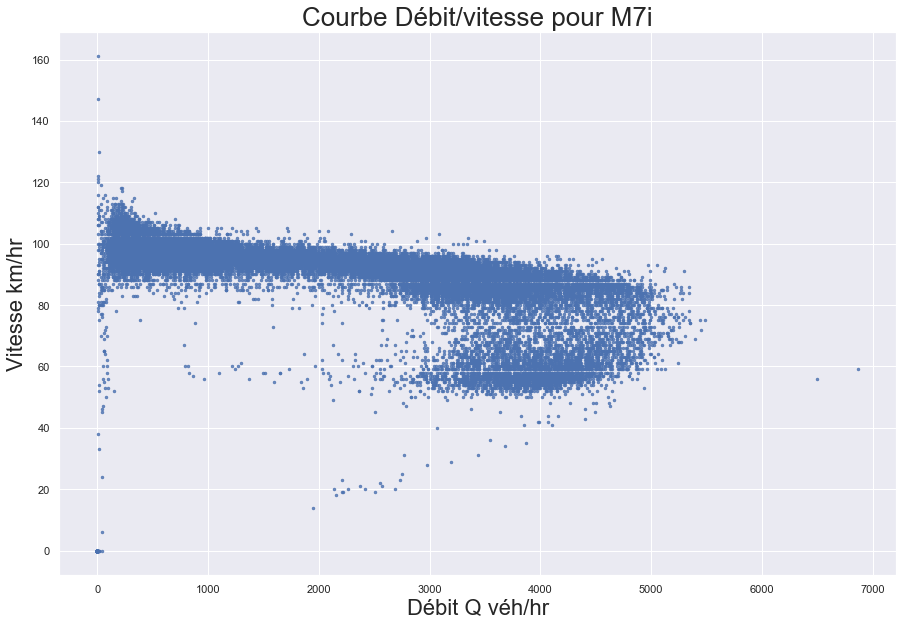

In [107]:
fig = plt.figure(figsize=(15, 10))
b= sns.regplot(x= M7i['Q'], y=M7i['Vitesse'], scatter_kws={'s':6}, fit_reg=False)
b.set_xlabel("Débit Q véh/hr",fontsize=22)
b.set_ylabel("Vitesse km/hr",fontsize=22)
plt.title('Courbe Débit/vitesse pour M7i',fontsize = 26)
#fig.savefig('figure8.png')

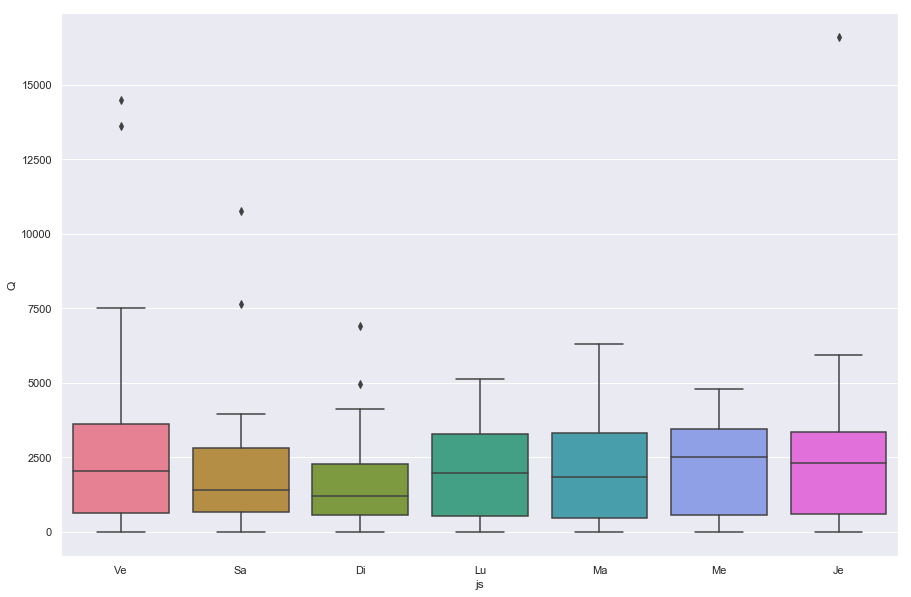

In [33]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot( x= 'js' , y='Q', data = M7i, palette = 'husl')
fig.savefig('figure7.png')

In [126]:
### Débit horaire
selection = (M7i['Q'] <= 6000)
q = M7i[selection]
PRC(q)

0.24449877750611246

In [127]:
### Vitesse horaire
selection = (M7i['Vitesse'] <= 160)
v = M7i[selection]
PRC(v) 

0.0

In [128]:
### To horaire
selection = (M7i['To'] <= 100)
t = M7i[selection]
PRC(t) 

0.04445432318292954

 **Remarque :**
Lorsque le débit ou la vitesse est nul ou encore le To la voie est vide. Donc une heure sans donnée, revient à dire que la voie est vide cette heure ci.

In [129]:
### Débit et TO incompatibles
selection =  (M7i['Q'] > 20) & (M7i['To'] > 0)
qq = M7i[selection]
PRC(qq)

6.579239831073572

In [130]:
### Vitesse horaire
selection = (M7i['Vitesse'] > 5) & (M7i['Q'] > 0)
vv = M7i[selection]
PRC(vv)

4.512113803067348

In [131]:
### To horaire
selection = (M7i['To'] > 0)
tt = M7i[selection]
PRC(tt)

6.579239831073572

##### Résultat :
La part des valeurs extrêmes sont les suivantes:


| **Champs** | **D.extremes**   |
|------|------|
|   **Debit Q** | **5.01%**|
|------|------|
|   **Vitesse**  | **4.51%**|
|------|------|
|   **To**  | **6.58%**|


In [132]:
# Transformer les donnees a des dataframe
lst = [q,v,t,qq,vv,tt]
for i in lst :
    i = pd.DataFrame(i)

In [133]:
# Eliminer les valeurs aberrantes
inter1 = pd.merge(q, v, how='inner')
inter2 = pd.merge(t, qq, how='inner')
inter3 = pd.merge(vv, tt, how='inner')
inter4 = pd.merge(inter1, inter2, how='inner')
tab_M7i = pd.merge(inter3, inter4, how='inner')


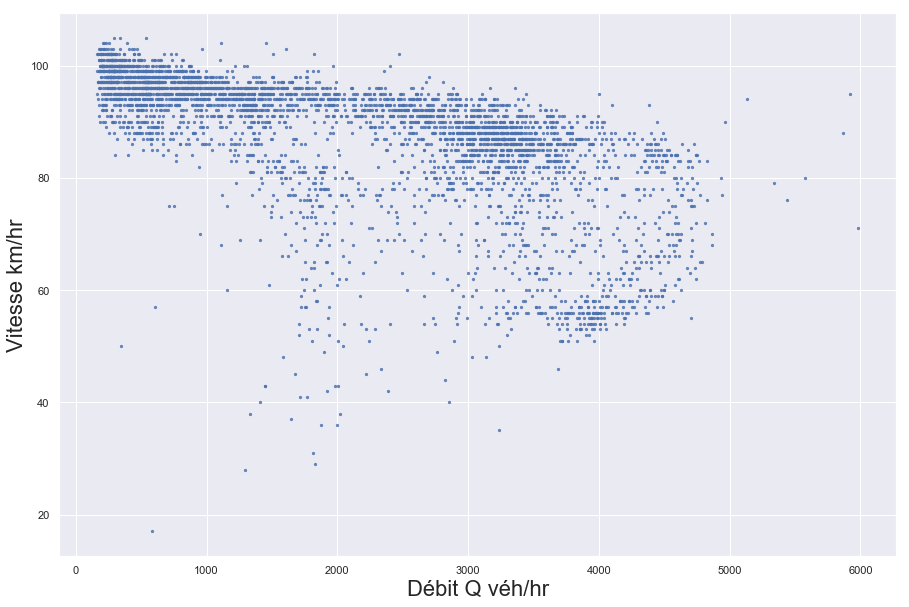

In [18]:
fig = plt.figure(figsize=(15, 10))
b= sns.regplot(x= tab_M7i['Q'], y=tab_M7i['Vitesse'], scatter_kws={'s':5}, fit_reg=False)
b.set_xlabel("Débit Q véh/hr",fontsize=22)
b.set_ylabel("Vitesse km/hr",fontsize=22)
#plt.title(' Nuage Q/V  Pour M7i / A7i',fontsize = 26)
fig.savefig('figure9.png')

La table M7i après le nettoyage de données: 

In [37]:
# La table M7i après les reconstitutions
tab_M7i.describe()

,pr,m,Vitesse,To,Q,K
count,4192.0,4192.0,4192.000000,4192.000000,4192.000000,4192.000000
mean,264.0,687.0,87.361164,13.112357,2057.757395,25.775725
std,0.0,0.0,12.261635,12.080262,1355.054191,19.648838
min,264.0,687.0,17.000000,1.000000,164.000000,1.617647
25%,264.0,687.0,84.000000,3.000000,727.250000,7.630326
50%,264.0,687.0,91.000000,10.000000,1915.000000,23.325128
75%,264.0,687.0,96.000000,19.000000,3246.250000,38.474138
max,264.0,687.0,105.000000,63.000000,5981.000000,92.371429


La boxplot a nouveau après avoir éliminer les valeurs extrêmes :

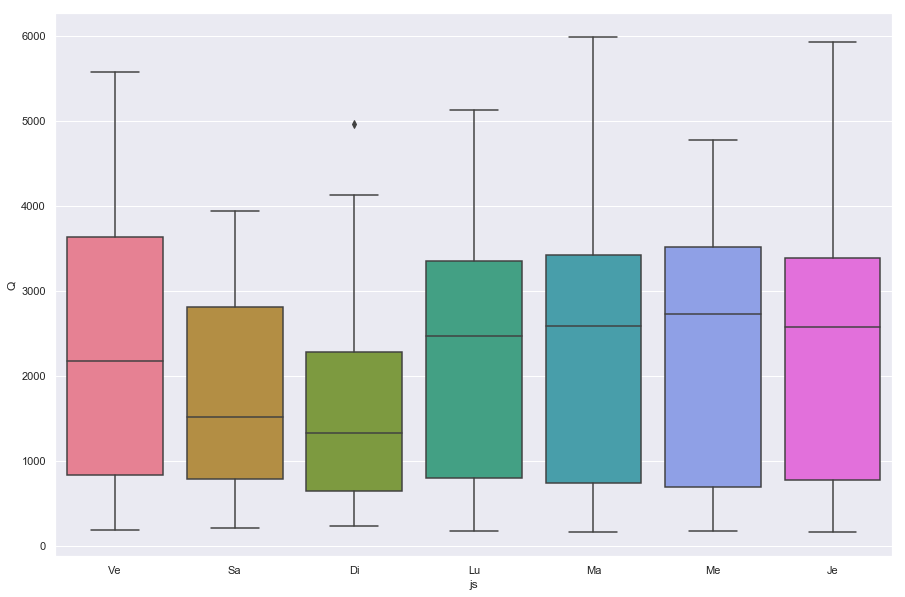

In [34]:
fig = plt.figure(figsize=(15, 10)) 
sns.boxplot(x= 'js' , y='Q', data = tab_M7i, palette = 'husl')
fig.savefig('figure10.png')

### Point de mesures : 811#M8k

- Coordonnées: 597278.1656 ; 5359050.2415
- Axe: A7
- Sens: Marseille->Lyon
- PR: 277+278
- Long: représentée 1,621 km
- Nombre de voies: 3
- Nombre de capteurs: 3
- Largeur par voie: 3,5m
- Présence BAU: oui
Identifier la table des donnees du point de mesures 811#M8k


In [23]:
#Table de donnees de la station M8k
M7o = grouped.get_group('M7o')
#transformer la table en dataframe
M7o = pd.DataFrame(M7o)
M7o.describe()

,pr,m,Vitesse,To,Q
count,4499.0,4499.0,4499.000000,4499.000000,4499.000000
mean,267.0,861.0,104.690820,5.396755,1293.550789
std,0.0,0.0,14.945022,5.146515,941.914945
min,267.0,861.0,0.000000,0.000000,0.000000
25%,267.0,861.0,105.000000,1.000000,443.000000
50%,267.0,861.0,107.000000,5.000000,1370.000000
75%,267.0,861.0,109.000000,9.000000,1981.000000
max,267.0,861.0,193.000000,82.000000,16559.000000


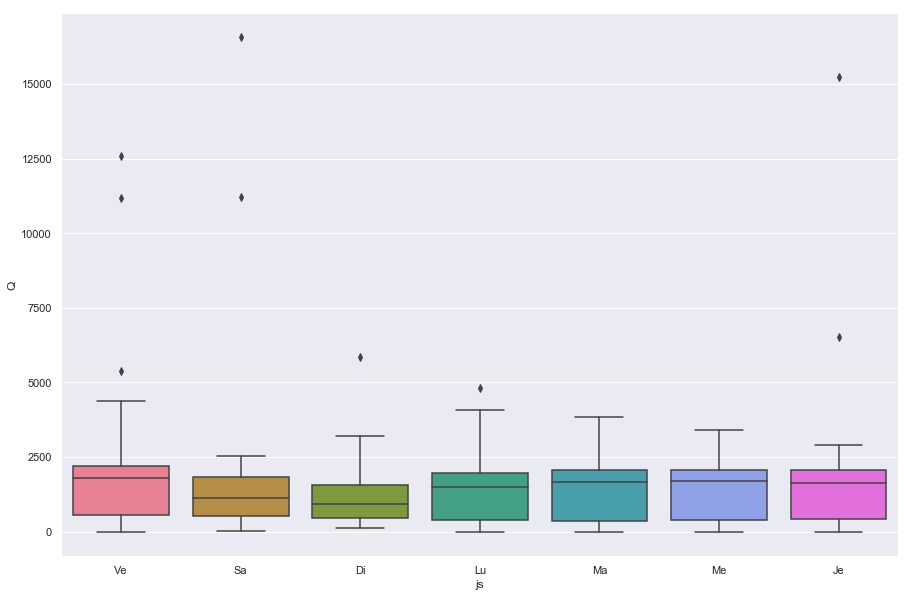

In [24]:
plt.figure(figsize=(15, 10))
sns.boxplot( x= 'js' , y='Q', data = M7o, palette = 'husl')

In [25]:
M7o.head()

,rgs,pr,m,js,jjmmaa,hhmm,Vitesse,To,Qualite,Q,A,Code
3,715#M7o,267,861,Ve,01/01/2016,00:00,110.0,1.0,,327.0,715,M7o
24,715#M7o,267,861,Ve,01/01/2016,01:00,106.0,1.0,,404.0,715,M7o
45,715#M7o,267,861,Ve,01/01/2016,02:00,105.0,2.0,,607.0,715,M7o
66,715#M7o,267,861,Ve,01/01/2016,03:00,107.0,2.0,,650.0,715,M7o
87,715#M7o,267,861,Ve,01/01/2016,04:00,107.0,2.0,,645.0,715,M7o


In [26]:
### Débit horaire
selection = (M7o['Q'] <= 5000)
q = M7o[selection]
PRC(q)

0.17781729273171815

In [27]:
### Vitesse horaire
selection = (M7o['Vitesse'] <= 160)
v = M7o[selection]
PRC(v)

0.04445432318292954

In [28]:
### To horaire
selection = (M7o['To'] <= 100)
t = M7o[selection]
PRC(t)

0.0

In [29]:
### Débit incompatibles
selection = (M7o['Q'] > 50)
qq = M7o[selection]
PRC(qq)

2.6894865525672373

In [30]:
### Vitesse horaire
selection = (M7o['Vitesse'] > 5)
vv = M7o[selection]
PRC(vv)

1.6225827961769281

In [31]:
### To horaire
selection = (M7o['To'] > 0)
tt = M7o[selection]
PRC(tt)

12.402756168037342

##### Résultat :
La part des valeurs extremes sont les suivantes:


| **Champs** | **D.extremes**   |
|------|------|
|   **Debit Q** | **5.75%**|
|------|------|
|   **Vitesse**  | **1.7%**|
|------|------|
|   **To**  | **12.40%**|

La table M7o après le nettoyage de données:

In [32]:
# Transformer les donnees a des dataframe
lst = [q,v,t,qq,vv,tt]
for i in lst :
    i = pd.DataFrame(i)

In [33]:
# Eliminer les valeurs aberrantes
inter1 = pd.merge(q, v, how='inner')
inter2 = pd.merge(t, qq, how='inner')
inter3 = pd.merge(vv, tt, how='inner')
inter4 = pd.merge(inter1, inter2, how='inner')
tab_M7o = pd.merge(inter3, inter4, how='inner')
tab_M7o.describe()

,pr,m,Vitesse,To,Q
count,3933.0,3933.0,3933.000000,3933.000000,3933.000000
mean,267.0,861.0,106.050598,6.074752,1440.383168
std,0.0,0.0,5.665545,4.577634,769.063236
min,267.0,861.0,21.000000,1.000000,154.000000
25%,267.0,861.0,105.000000,2.000000,671.000000
50%,267.0,861.0,106.000000,6.000000,1645.000000
75%,267.0,861.0,109.000000,9.000000,2027.000000
max,267.0,861.0,123.000000,61.000000,4806.000000


La boxplot a nouveau après avoir éliminer les valeurs extrêmes :

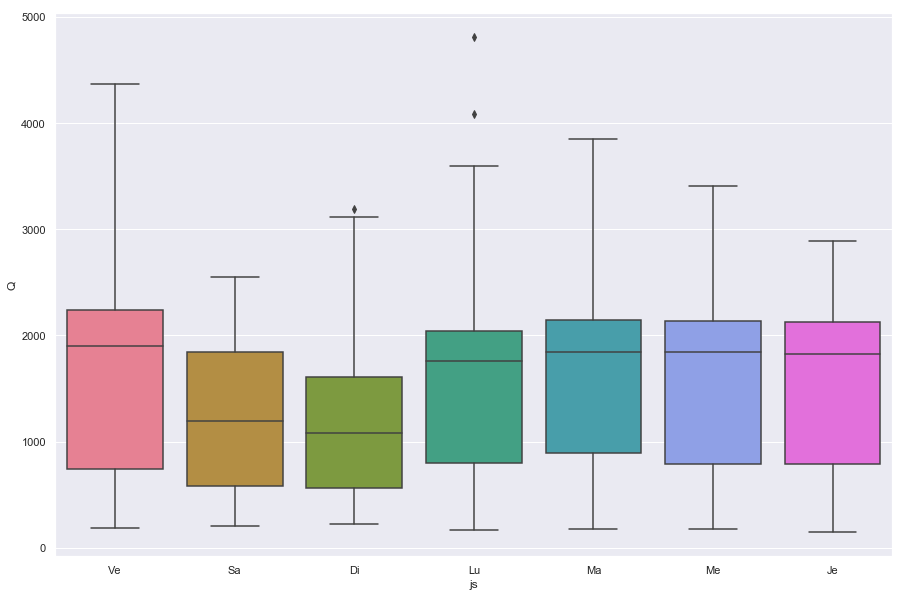

In [34]:
plt.figure(figsize=(15, 10)) 
sns.boxplot(x= 'js' , y='Q', data = tab_M7o, palette = 'husl')

# Analyse du diagramme fondamental
Après une étape de qualification des données, cette partie aborde les trois représentations du diagramme fondamental.
Nous avons vu plus haut les définitions d’un certain nombre de grandeurs relatives au trafic :

• **Le débit $Q$** (nombre de véhicules passant pendant une période de temps donnée en un point).

• **La concentration $K$** (nombre de véhicules présents à un instant sur une longueur de route donnée).

• **La vitesse $V$** (vitesse moyenne des véhicules présents à un instant sur une longueur de route donnée).

Relation fondamentale : La vitesse $V$ moyenne d’un flot de véhicules dans l’espace est donc donnée par l’équation : $V = Q/K$.
Ces trois variables sont reliées par la relation $Q = K \times V$ s’appelle relation fondamentale d’équilibre.

Ce chapitre a pour objectif d’illustrer ces grandes notions en présentant les liens qui existent entre elles.

La concentration K est inversement proportionnelle à la vitesse, en effet, plus la vitesse est élevée plus la concentration est faible.

Cette relation prendra toute son importance dans le chapitre suivant.

## Les trois représentations du diagramme fondamental :

L’écoulement du trafic peut être modélisé selon des relations liant le débit a la vitesse moyenne ou au taux d’occupation. La vitesse moyenne $V$ est une fonction monotone décroissante de la concentration $K$. Cette hypothèse s’appelle hypothèse du diagramme fondamental. Ce dernier est représenté par la relation $V = f(K)$. A partir de la relation : $Q = V \times K$, le diagramme fondamental peut être représenté par $Q = f(K)$ ou $V = f(Q)$.

 On peut donc représenter la relation fondamentale de trois manières différentes :
- $Q = f(K)$ ou bien $Q= f(To).$
- $V = f(K).$
- $V = f(Q).$

Le débit maximal ou la capacité sera typiquement de 5 000 à 6 000 véh/h.

In [134]:
# Ajouter le champs de Concentration K
tab_M7i['K'] = (tab_M7i['Q'])/(tab_M7i['Vitesse'])
#tab_M7o['K'] = (tab_M7o['Q'])/(tab_M7o['Vitesse'])

Lorsque la concentration est faible, on peut supposer que le débit qui passe en un point va croître de manière presque linéaire. Si les véhicules ne sont pas contraints, alors plus ils sont nombreux dans une zone située en amont d’un point donné (concentration), plus ils seront nombreux à passer dans les minutes suivantes en ce point (débit).

Ceci est vrai jusqu’à ce que le débit atteigne la capacité de la voie. À ce moment-là, en effet, il y a
une contrainte qui s’oppose à l’écoulement libre des véhicules.

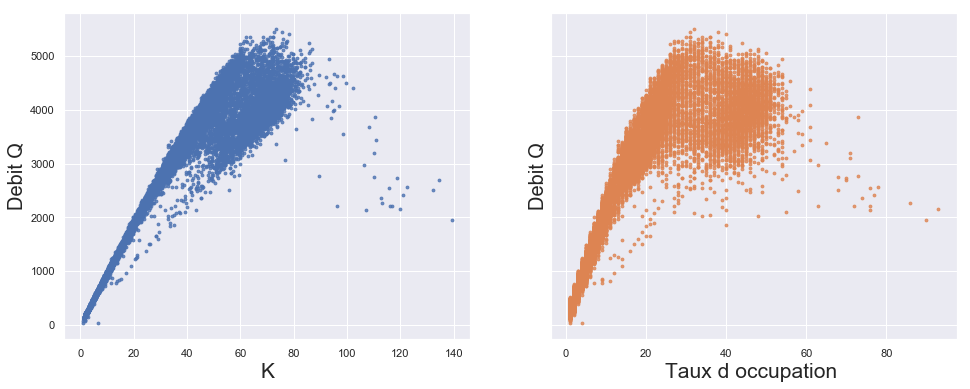

In [93]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6), sharey=True)
b = sns.regplot(x= tab_M7i['K'], y=tab_M7i['Q'], fit_reg=False, scatter_kws={'s':8}, ax=axs[0])
a = sns.regplot(x= tab_M7i['To'], y=tab_M7i['Q'], scatter_kws={'s':8}, fit_reg=False, ax=axs[1])
b.set_xlabel('K', fontsize = 21); b.set_ylabel('Debit Q', fontsize = 20);a.set_ylabel('Debit Q', fontsize = 20)
a.set_xlabel("Taux d occupation ", fontsize = 21)
#fig.suptitle("Diagramme de niveau de service, Q=f(K) et Q=f(To) pour M7i", fontsize=20)
fig.savefig('figure11.png')

In [49]:
import statsmodels.api as sm
x = sm.add_constant(tab_M7i['K'])
reg1 = sm.OLS(tab_M7i['Q'], x ).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.091e+04
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:48:59   Log-Likelihood:                -31198.
No. Observations:                4192   AIC:                         6.240e+04
Df Residuals:                    4190   BIC:                         6.241e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        364.7550     10.524     34.658      0.0

Text(0.5, 0.98, 'Diagramme de niveau de service, Q=f(K) et Q=f(To) pour M7o')

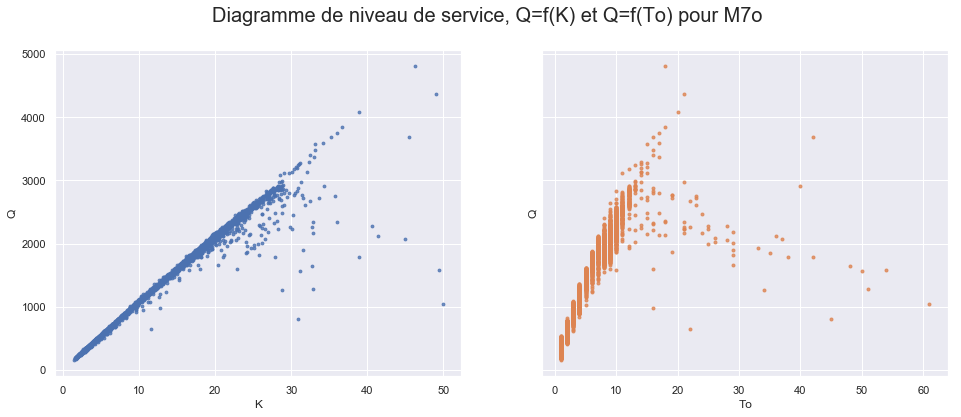

In [37]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6), sharey=True)
sns.regplot(x= tab_M7o['K'], y=tab_M7o['Q'], fit_reg=False, scatter_kws={'s':8}, ax=axs[0])
sns.regplot(x= tab_M7o['To'], y=tab_M7o['Q'], fit_reg=False, scatter_kws={'s':9}, ax=axs[1])
fig.suptitle("Diagramme de niveau de service, Q=f(K) et Q=f(To) pour M7o", fontsize=20)

On voit bien que les deux graphe se ressemblent donc **la concentration alors est liée au taux d’occupation $To$**
et présenter le débit $Q$ en fonction de la concentration $K$ revient a le représenter par le taux d’occupation $To$.

 Le taux d’occupation $To$ est lié à la concentration $K$ par la relation suivante :
$$To = (L + l) K.$$
Avec :
-	$To$ : taux d’occupation mesuré par boucle électromagnétique.
-	$L$ : longueur moyenne des véhicules.
-	$l$ : longueur de la boucle de mesure.

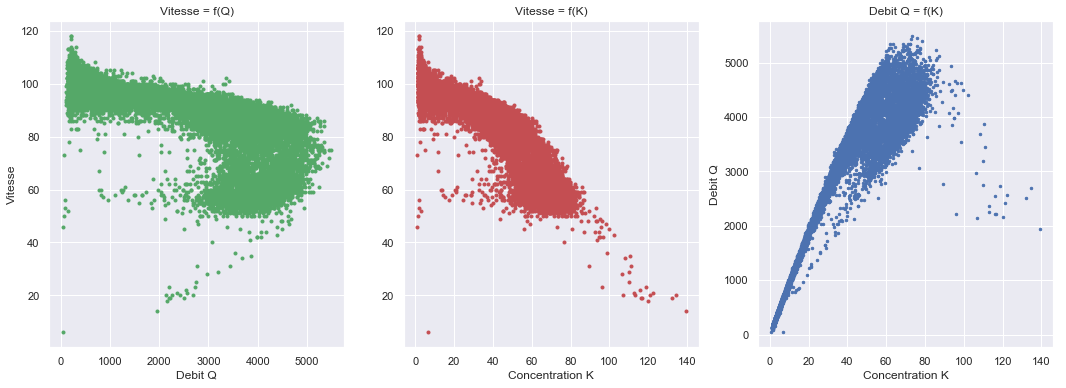

In [66]:
fig = plt.figure(figsize=(18,6))
#AXES
ax1 = fig.add_subplot(131); ax2 = fig.add_subplot(132); ax3 = fig.add_subplot(133)

#Data
ax1.scatter(tab_M7i['Q'], tab_M7i['Vitesse'], s=9, c='g', marker="o")
ax2.scatter(tab_M7i['K'], tab_M7i['Vitesse'], s=9, c='r', marker="o")
ax3.scatter(tab_M7i['K'], tab_M7i['Q'], s=6, c='b', marker="o")

#Labels
ax1.set_xlabel('Debit Q'); ax1.set_ylabel('Vitesse')
ax2.set_xlabel('Concentration K'); #fig.suptitle("Diagrammes de niveau de service pour M7i", fontsize=20)
ax3.set_xlabel('Concentration K'); ax3.set_ylabel('Debit Q')
ax3.set_title('Debit Q = f(K)'); ax2.set_title('Vitesse = f(K)'); ax1.set_title('Vitesse = f(Q)')
plt.show()
#fig.savefig('figure12.png')

In [87]:
# recuperer la premiere partie de la courbe (Debit-Concentration)
tabreg1 = tab_M7i[(tab_M7i['K'] <= 78)]

In [88]:
import statsmodels.api as sm
x1= sm.add_constant(tabreg1['K'])
reg1 = sm.OLS(tabreg1['Q'], x1).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.133e+05
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:22:47   Log-Likelihood:            -1.6949e+05
No. Observations:               22464   AIC:                         3.390e+05
Df Residuals:                   22462   BIC:                         3.390e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        440.2594      5.265     83.625      0.0

In [96]:
tabreg2 = tab_M7i[(tab_M7i['K'] > 78)]

In [97]:
x2= sm.add_constant(tabreg2['K'])
reg2 = sm.OLS(tabreg2['Q'], x2).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     331.7
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           6.02e-45
Time:                        16:07:27   Log-Likelihood:                -1559.1
No. Observations:                 210   AIC:                             3122.
Df Residuals:                     208   BIC:                             3129.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8155.7859    211.106     38.634      0.0

/Users/mac/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


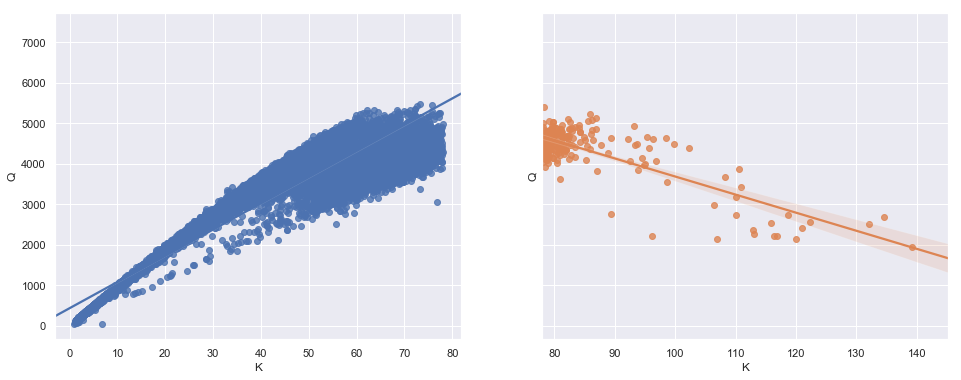

In [98]:
fig, ax =plt.subplots(1,2 , figsize=(16,6), sharey=True)
sns.regplot(x='K', y='Q', data=tabreg1, ax=ax[0])
sns.regplot(x='K', y='Q', data=tabreg2, ax=ax[1])
ax[1].set_xlim(78,)
fig.show()
fig.savefig('figure20.png')

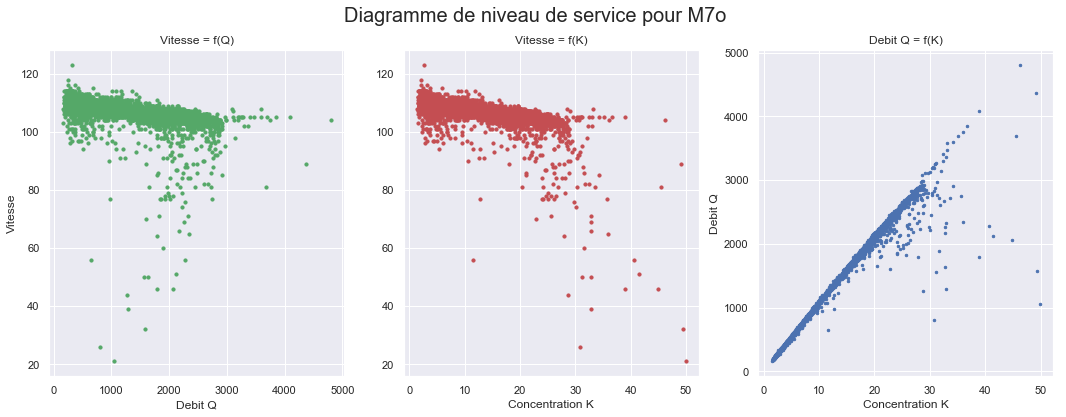

In [300]:
fig = plt.figure(figsize=(18,6))
#AXES
ax1 = fig.add_subplot(131); ax2 = fig.add_subplot(132); ax3 = fig.add_subplot(133)

#Data
ax1.scatter(tab_M7o['Q'], tab_M7o['Vitesse'], s=10, c='g', marker="o")
ax2.scatter(tab_M7o['K'], tab_M7o['Vitesse'], s=10, c='r', marker="o")
ax3.scatter(tab_M7o['K'], tab_M7o['Q'], s=6, c='b', marker="o")
#Labels
ax1.set_xlabel('Debit Q'); ax1.set_ylabel('Vitesse');fig.suptitle("Diagramme de niveau de service pour M7o", fontsize=20)
ax2.set_xlabel('Concentration K'); ax3.set_xlabel('Concentration K'); ax3.set_ylabel('Debit Q')
ax3.set_title('Debit Q = f(K)'); ax2.set_title('Vitesse = f(K)'); ax1.set_title('Vitesse = f(Q)')
plt.show()

 Sur la courbe débit-concentration (dernier diagramme), la première partie de la courbe correspond à l’état de circulation fluide. Le débit augmente avec la concentration jusqu'à une certaine valeur $K_{cr}$ appelée concentration critique. 

Le niveau de débit correspondant à cette concentration traduit la capacité au point considéré, c’est-à-dire de débit maximal $Q_{max}$ susceptible d’être écoulé. Au delà de ce seuil critique, si la concentration continue d’augmenter, le débit lui, se met à régresser. Le trafic présente alors une certaine instabilité. Ainsi, un même débit correspond a deux valeurs bien distinctes de la concentration, selon que la circulation est fluide ou saturée. 

La concentration critique $K_{cr}$ dans les deux stations est entre $50$ et $60$ qui correspond au débit maximal $Q_{max}$ est entre 4500 et 5000 véh/h.


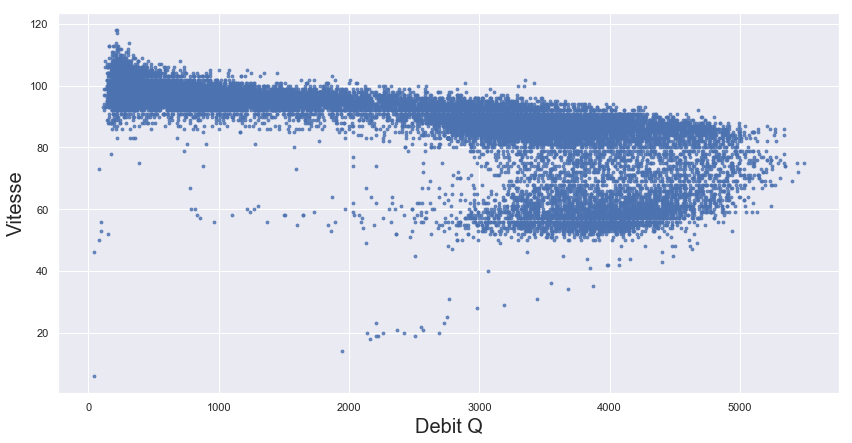

In [105]:
fig = plt.figure(figsize=(14, 7))
b= sns.regplot(x= tab_M7i['Q'], y=tab_M7i['Vitesse'], scatter_kws={'s':8}, fit_reg=False)
b.set_xlabel("Debit Q",fontsize=20)
b.set_ylabel("Vitesse",fontsize=20)
#plt.title('Diagramme de niveaux de service Vitesse = f(Q) pour la station M7i',fontsize = 25)
fig.savefig('figure13.png')

Text(0.5, 1.0, 'Diagramme de niveaux de service Vitesse = f(Q) pour la station M7o')

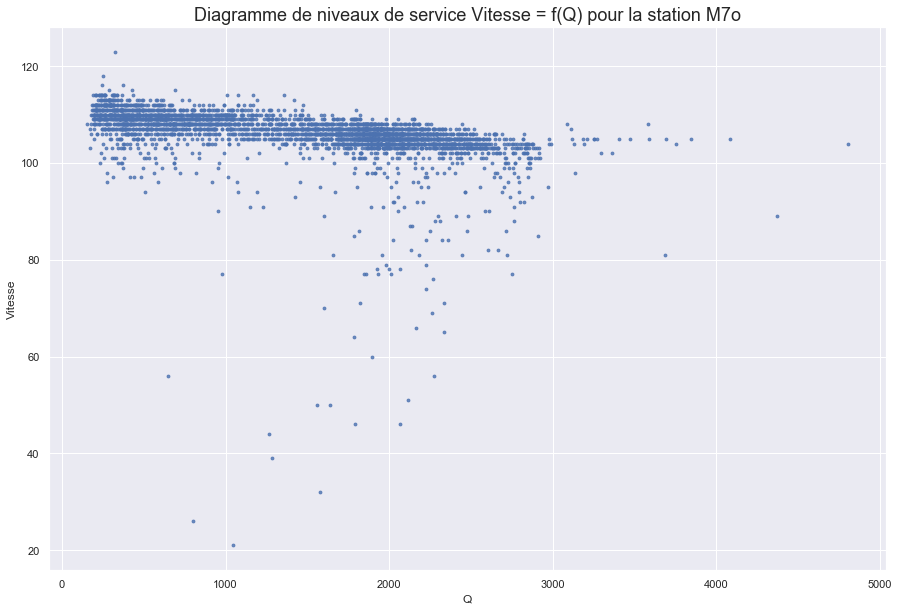

In [301]:
plt.figure(figsize=(15, 10))
sns.regplot(x= tab_M7o['Q'], y=tab_M7o['Vitesse'], scatter_kws={'s':8}, fit_reg=False)
plt.title('Diagramme de niveaux de service Vitesse = f(Q) pour la station M7o',fontsize = 18)

Dans le plan débit-vitesse (premier diagramme), $V_{max}$ est aussi appelée ‘vitesse libre’ et correspond a la vitesse de circulation a débit faible.

La vitesse critique $V_{cr}$ (ou vitesse optimale) est la vitesse correspondant au débit maximal.

Ici $V_{max} = 120 km/h $ correspond a un debit faible de $400 v/h$ et la vitesse critique $V_{cr}= 80 km/h$ correspondant au débit maximal $5000 v/h$.

In [141]:
#Tables de donnees par jours
Lu_M7i = tab_M7i[tab_M7i['js'].str.startswith('Lu')]; Ma_M7i = tab_M7i[tab_M7i['js'].str.startswith('Ma')]
Me_M7i = tab_M7i[tab_M7i['js'].str.startswith('Me')]; je_M7i = tab_M7i[tab_M7i['js'].str.startswith('Je')]
Ve_M7i = tab_M7i[tab_M7i['js'].str.startswith('Ve')]
Mj_M7i = pd.concat([Ma_M7i, je_M7i])

In [142]:
#La moyenne, les quantiles et le max des champs par heure pour Mardi.
MM7i_moy = Ma_M7i.groupby(['hhmm'], as_index=False).mean()
MM7i_Qu1 = Ma_M7i.groupby(['hhmm'], as_index=False).quantile(.1)
MM7i_Qu2 = Ma_M7i.groupby(['hhmm'], as_index=False).quantile(.50)
MM7i_Qu3 = Ma_M7i.groupby(['hhmm'], as_index=False).quantile(.90)
MM7i_max = Ma_M7i.groupby(['hhmm'], as_index=False).max() 

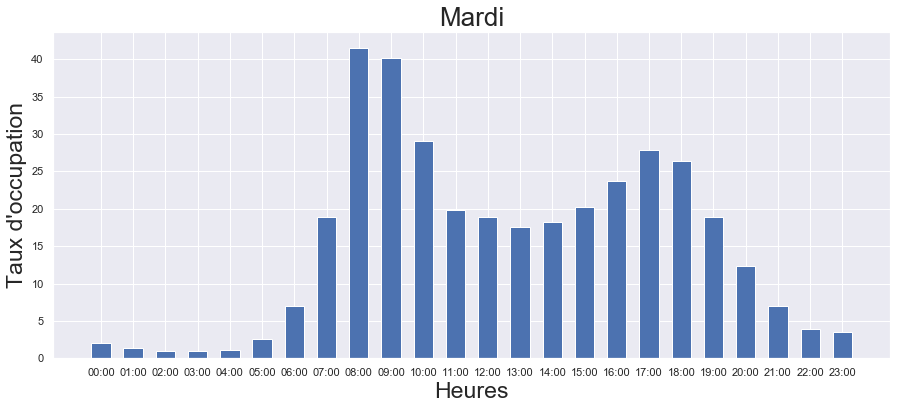

In [140]:
#fig = plt.subplots(figsize=(15,8))
fig = plt.figure(figsize=(15, 6))
plt.bar(MM7i_moy['hhmm'],MM7i_moy['To'], width = .6)
plt.ylabel("Taux d'occupation", fontsize = 23) 
plt.xlabel('Heures', fontsize = 23) 
#plt.title("Répartition horaire de taux d'occupation sur un Mardi type pour M7i", fontsize = 28)
plt.title("Mardi", fontsize = 26)
plt.show()
fig.savefig('figure14.png')

In [143]:
# La moyenne des champs par heure.
jM7i_moy = je_M7i.groupby(['hhmm'], as_index=False).mean()
MeM7i_moy = Me_M7i.groupby(['hhmm'], as_index=False).mean()
LM7i_moy = Lu_M7i.groupby(['hhmm'], as_index=False).mean()
VM7i_moy = Ve_M7i.groupby(['hhmm'], as_index=False).mean()

AttributeError: 'tuple' object has no attribute 'savefig'

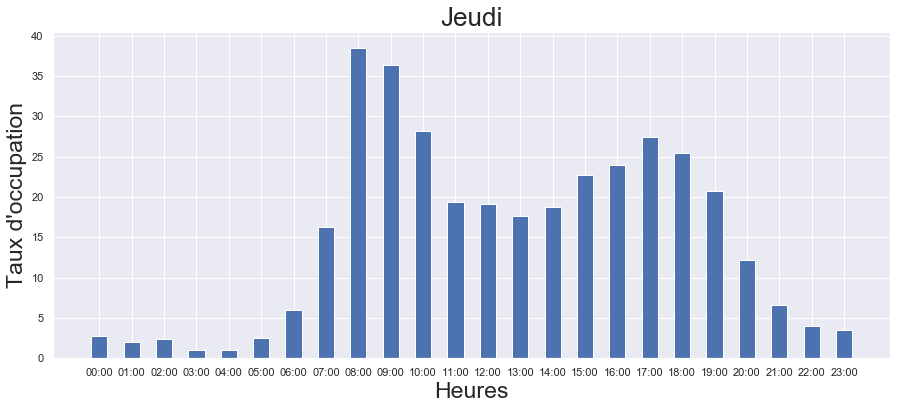

In [147]:
fig = plt.subplots(figsize=(15,6))
#fig = plt.figure(figsize=(15, 6))
plt.bar(jM7i_moy['hhmm'],jM7i_moy['To'], width = .5)
plt.ylabel("Taux d'occupation", fontsize = 23) 
plt.xlabel('Heures', fontsize = 23) 
#plt.title("Répartition horaire de taux d'occupation sur un Jeudi type pour M7i", fontsize = 28) 
plt.title("Jeudi", fontsize = 26) 
fig.savefig('figure15.png')
plt.show()

In [42]:
#Tables de donnees par jours
Lu_M7o = tab_M7o[tab_M7o['js'].str.startswith('Lu')]; Ma_M7o = tab_M7o[tab_M7o['js'].str.startswith('Ma')]
Me_M7o = tab_M7o[tab_M7o['js'].str.startswith('Me')]; je_M7o = tab_M7o[tab_M7o['js'].str.startswith('Je')]
Ve_M7o = tab_M7o[tab_M7o['js'].str.startswith('Ve')]; Mj_M7o = pd.concat([Ma_M7o, je_M7o])

NameError: name 'tab_M7o' is not defined

## Evolution du trafic (du débit et de la vitesse) :


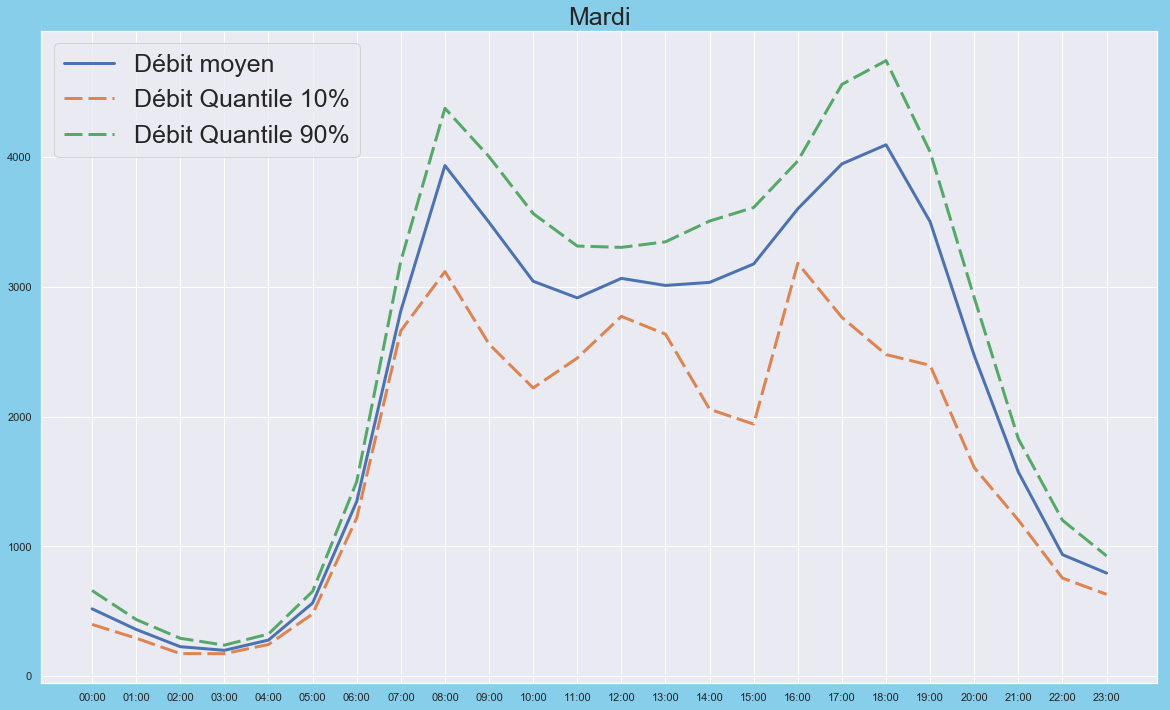

In [110]:
fig, ax = plt.subplots(figsize = (20,12), facecolor='skyblue')
#plt.title("évolution du débit sur un Mardi type dans M7i", fontsize = 25)
plt.title("Mardi", fontsize = 25)
line1, = ax.plot(MM7i_moy['hhmm'],MM7i_moy['Q'], linewidth=3, label='Débit moyen')
line2, = ax.plot(MM7i_moy['hhmm'],MM7i_Qu1['Q'], dashes=[6, 2],linewidth=3, label='Débit Quantile 10%')
#line3, = ax.plot(MM7i_moy['hhmm'],MM7i_Qu2['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 2')
#line3, = ax.plot(MM7i_moy['hhmm'],C, dashes=[6, 2],linewidth=3, label='Débit Capacité')
line4, = ax.plot(MM7i_moy['hhmm'],MM7i_Qu3['Q'], dashes=[6, 2],linewidth=3, label='Débit Quantile 90%')
#line5, = ax.plot(MM7i_moy['hhmm'],MM7i_max['Q'],linewidth=3, label='Débit maximum')
ax.legend(fontsize = 25)
plt.show()
fig.savefig('figure16.png')

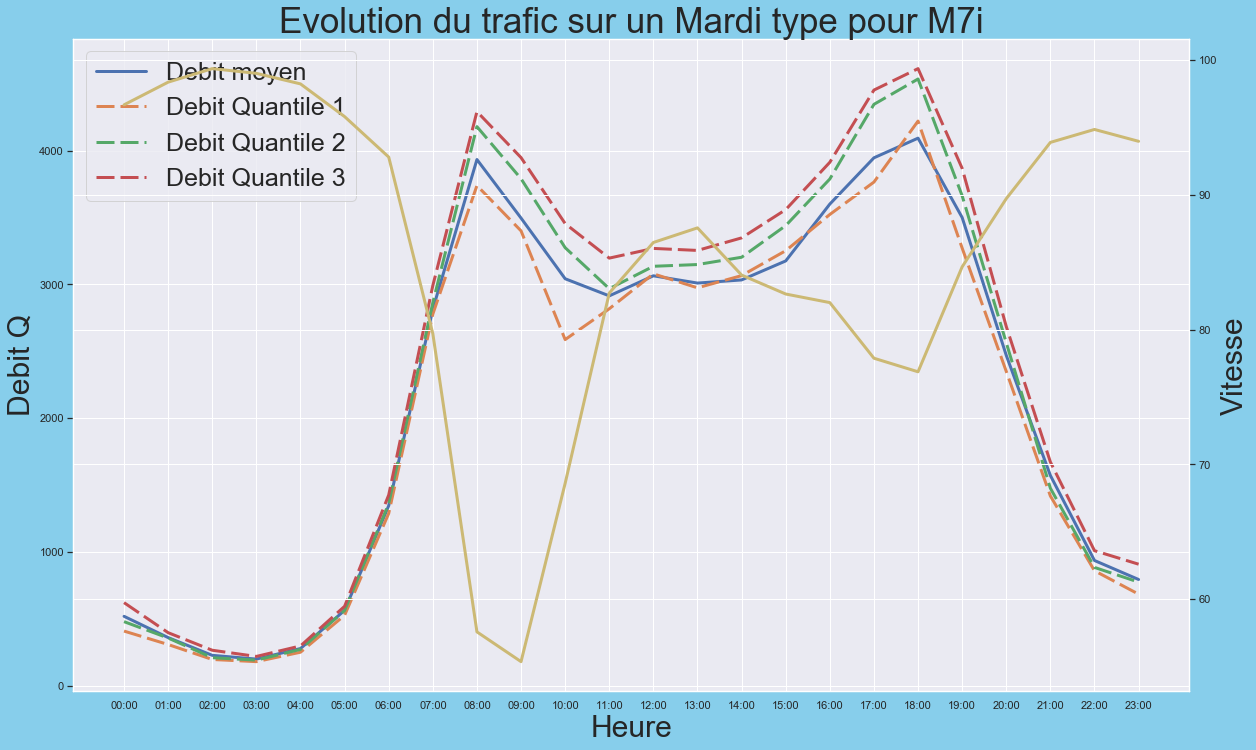

In [68]:
fig = plt.figure(figsize = (20,12), facecolor='skyblue')
ax1 = fig.add_subplot(111)
ax1.plot(MM7i_moy['hhmm'], MM7i_moy['Q'], linewidth=3, label='Debit moyen')
ax1.plot(MM7i_moy['hhmm'],MM7i_Qu1['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 1')
ax1.plot(MM7i_moy['hhmm'],MM7i_Qu2['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 2')
ax1.plot(MM7i_moy['hhmm'],MM7i_Qu3['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 3')
ax2 = ax1.twinx()
ax2.plot(MM7i_moy['hhmm'], MM7i_moy['Vitesse'], linewidth=3, color='y')
plt.title("Evolution du trafic sur un Mardi type pour M7i", fontsize = 35)
ax2.set_ylabel('Vitesse', fontsize = 30); ax1.set_xlabel('Heure', fontsize = 30); ax1.set_ylabel('Debit Q', fontsize = 30)
ax1.legend(fontsize = 25)
fig.savefig('evolution_DH1_M7i.png')

In [325]:
#La moyenne, les quantiles et le max des champs par heure pour Mardi.
MM7o_moy = Ma_M7o.groupby(['hhmm'], as_index=False).mean()
MM7o_Qu1 = Ma_M7o.groupby(['hhmm'], as_index=False).quantile(.10)
MM7o_Qu2 = Ma_M7o.groupby(['hhmm'], as_index=False).quantile(.50)
MM7o_Qu3 = Ma_M7o.groupby(['hhmm'], as_index=False).quantile(.90)
MM7o_max = Ma_M7o.groupby(['hhmm'], as_index=False).max()

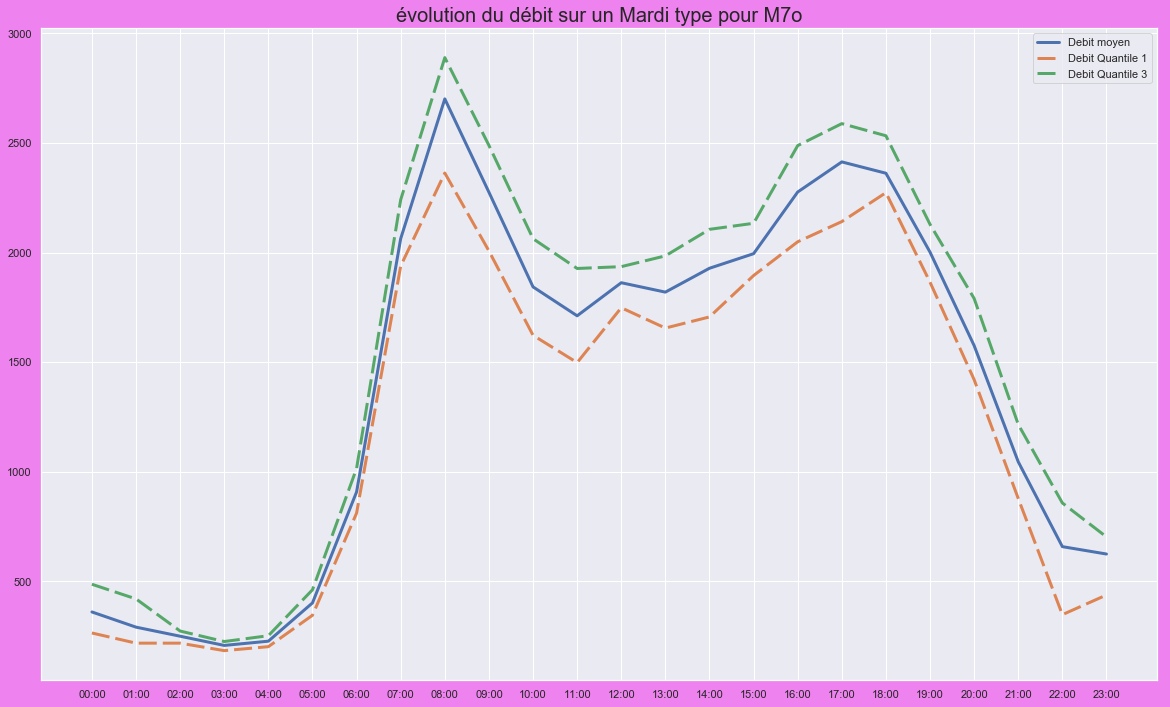

In [309]:
fig, ax = plt.subplots(figsize = (20,12), facecolor='violet')
plt.title("évolution du débit sur un Mardi type pour M7o", fontsize = 20)
line1, = ax.plot(MM7o_moy['hhmm'], MM7o_moy['Q'], linewidth=3, label='Debit moyen')
line2, = ax.plot(MM7o_moy['hhmm'],MM7o_Qu1['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 1')
#line3, = ax.plot(MM7o_moy['hhmm'],MM7o_Qu2['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 2')
line4, = ax.plot(MM7o_moy['hhmm'],MM7o_Qu3['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 3')
#line5, = ax.plot(MM7o_moy['hhmm'],MM7o_max['Q'],linewidth=3, label='Debit maximum')
ax.legend()
plt.show()


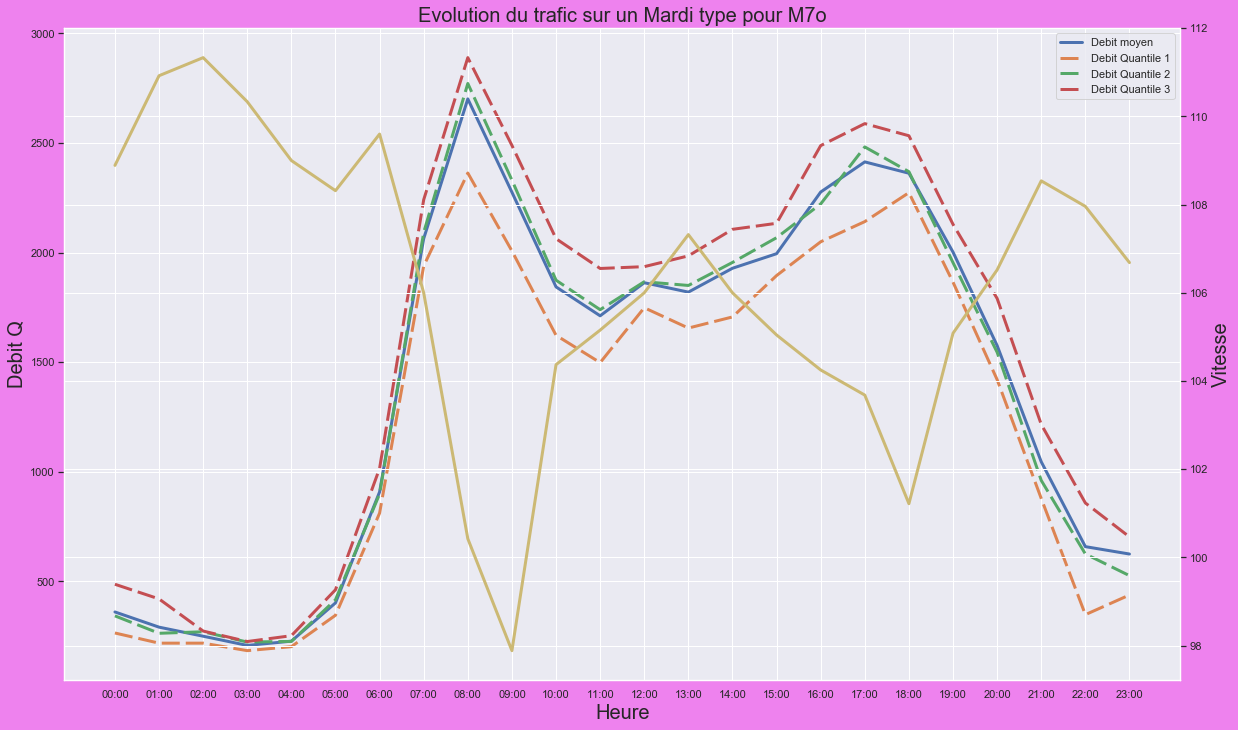

In [310]:
fig = plt.figure(figsize = (20,12), facecolor='violet')
ax1 = fig.add_subplot(111)
ax1.plot(MM7o_moy['hhmm'], MM7o_moy['Q'], linewidth=3, label='Debit moyen')
ax1.plot(MM7o_moy['hhmm'],MM7o_Qu1['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 1')
ax1.plot(MM7o_moy['hhmm'],MM7o_Qu2['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 2')
ax1.plot(MM7o_moy['hhmm'],MM7o_Qu3['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 3')
ax2 = ax1.twinx()
ax2.plot(MM7o_moy['hhmm'], MM7o_moy['Vitesse'], linewidth=3, color='y')
plt.title("Evolution du trafic sur un Mardi type pour M7o", fontsize = 20)
ax2.set_ylabel('Vitesse', fontsize = 20); ax1.set_xlabel('Heure', fontsize = 20); ax1.set_ylabel('Debit Q', fontsize = 20)
ax1.legend()

In [23]:
#La moyenne, les quantiles et le max des champs par heure pour Mardi et jeudi.
MjM7i_moy = Mj_M7i.groupby(['hhmm'], as_index=False).mean()
MjM7i_Qu1 = Mj_M7i.groupby(['hhmm'], as_index=False).quantile(.10)
MjM7i_Qu2 = Mj_M7i.groupby(['hhmm'], as_index=False).quantile(.50)
MjM7i_Qu3 = Mj_M7i.groupby(['hhmm'], as_index=False).quantile(.90)
MjM7i_max = Mj_M7i.groupby(['hhmm'], as_index=False).max(); MjM7i_moy.head()

,hhmm,pr,m,Vitesse,To,Q,K
0,00:00,264,687,96.369565,2.391304,596.260870,6.213843
1,01:00,264,687,97.755556,1.711111,423.866667,4.408131
2,02:00,264,687,98.878049,1.707317,392.585366,4.045375
3,03:00,264,687,99.090909,1.030303,215.696970,2.181795
4,04:00,264,687,98.195652,1.086957,273.217391,2.781026


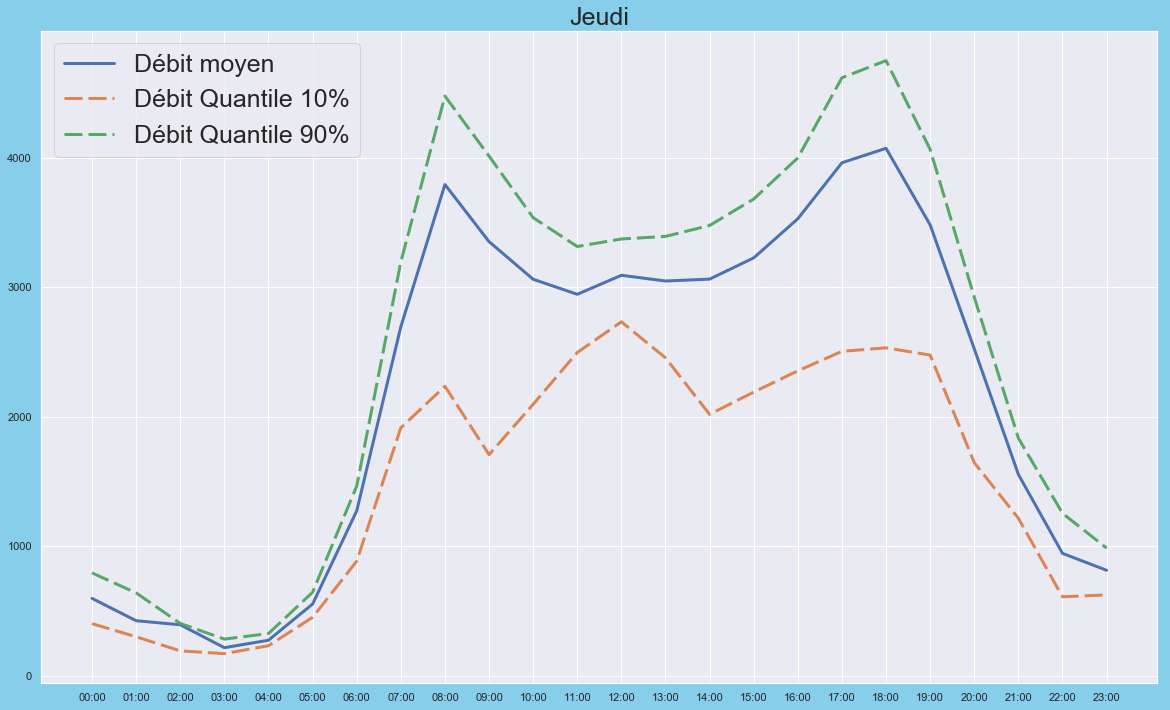

In [112]:
fig, ax = plt.subplots(figsize = (20,12), facecolor='skyblue')
#plt.title("évolution du débit sur Mardi et jeudi pour M7i", fontsize = 20)
plt.title("Jeudi", fontsize = 25)
line1, = ax.plot(MjM7i_moy['hhmm'],MjM7i_moy['Q'], linewidth=3, label='Débit moyen')
line2, = ax.plot(MjM7i_moy['hhmm'],MjM7i_Qu1['Q'], dashes=[6, 2],linewidth=3, label='Débit Quantile 10%')
#line3, = ax.plot(MjM7i_moy['hhmm'],MjM7i_Qu2['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 2')
line4, = ax.plot(MjM7i_moy['hhmm'],MjM7i_Qu3['Q'], dashes=[6, 2],linewidth=3, label='Débit Quantile 90%')
#line5, = ax.plot(MjM7i_moy['hhmm'],MjM7i_max['Q'],linewidth=3, label='Debit maximum')
ax.legend(fontsize = 25)
plt.show()
fig.savefig('figure17.png')

In [315]:
#La moyenne, les quantiles et le max des champs par heure pour Mardi et jeudi.
MjM7o_moy = Mj_M7o.groupby(['hhmm'], as_index=False).mean()
MjM7o_Qu1 = Mj_M7o.groupby(['hhmm'], as_index=False).quantile(.10)
MjM7o_Qu2 = Mj_M7o.groupby(['hhmm'], as_index=False).quantile(.50)
MjM7o_Qu3 = Mj_M7o.groupby(['hhmm'], as_index=False).quantile(.90)
MjM7o_max = Mj_M7o.groupby(['hhmm'], as_index=False).max(); MjM7o_moy.head()

,hhmm,pr,m,Vitesse,To,Q,K
0,00:00,267,861,108.918919,1.351351,419.189189,3.856952
1,01:00,267,861,110.566667,1.166667,348.866667,3.170536
2,02:00,267,861,110.285714,1.142857,293.428571,2.668087
3,03:00,267,861,109.750000,1.000000,207.875000,1.889580
4,04:00,267,861,109.409091,1.000000,219.590909,2.008522


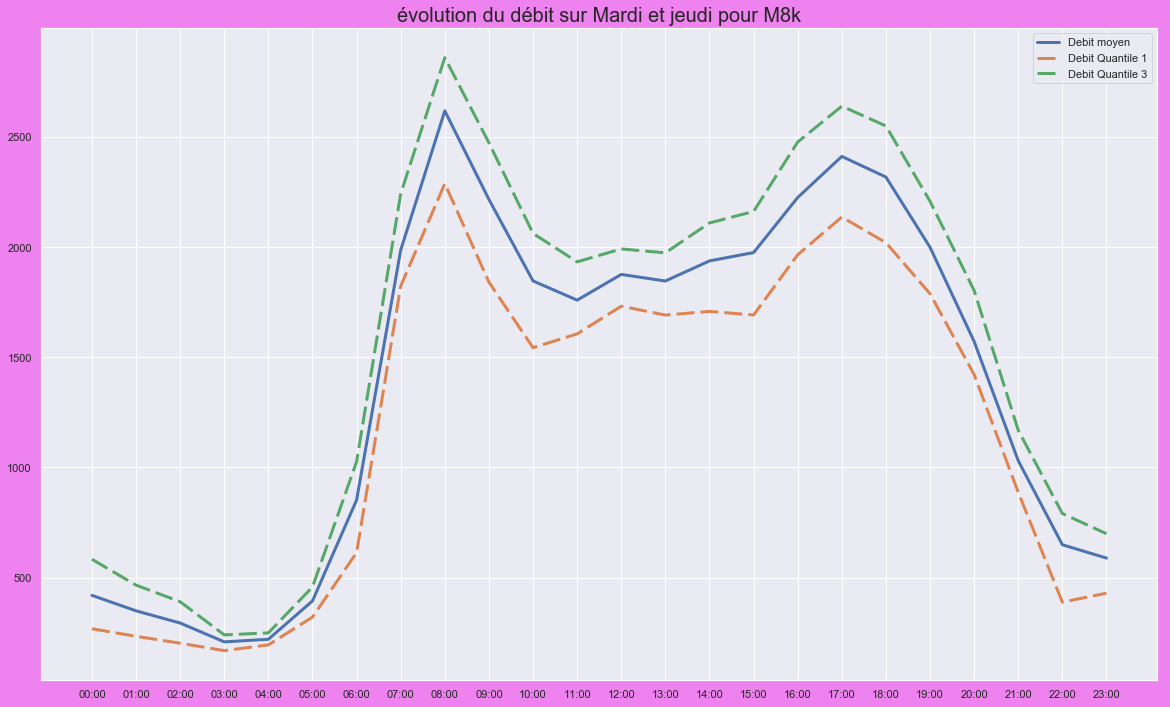

In [317]:
fig, ax = plt.subplots(figsize = (20,12), facecolor='violet')
plt.title("évolution du débit sur Mardi et jeudi pour M8k", fontsize = 20)
line1, = ax.plot(MjM7o_moy['hhmm'],MjM7o_moy['Q'], linewidth=3, label='Debit moyen')
line2, = ax.plot(MjM7o_moy['hhmm'],MjM7o_Qu1['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 1')
line4, = ax.plot(MjM7o_moy['hhmm'],MjM7o_Qu3['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 3')
#line5, = ax.plot(MjM7o_moy['hhmm'],MjM7o_max['Q'],linewidth=3, label='Debit maximum')
ax.legend()
plt.show()

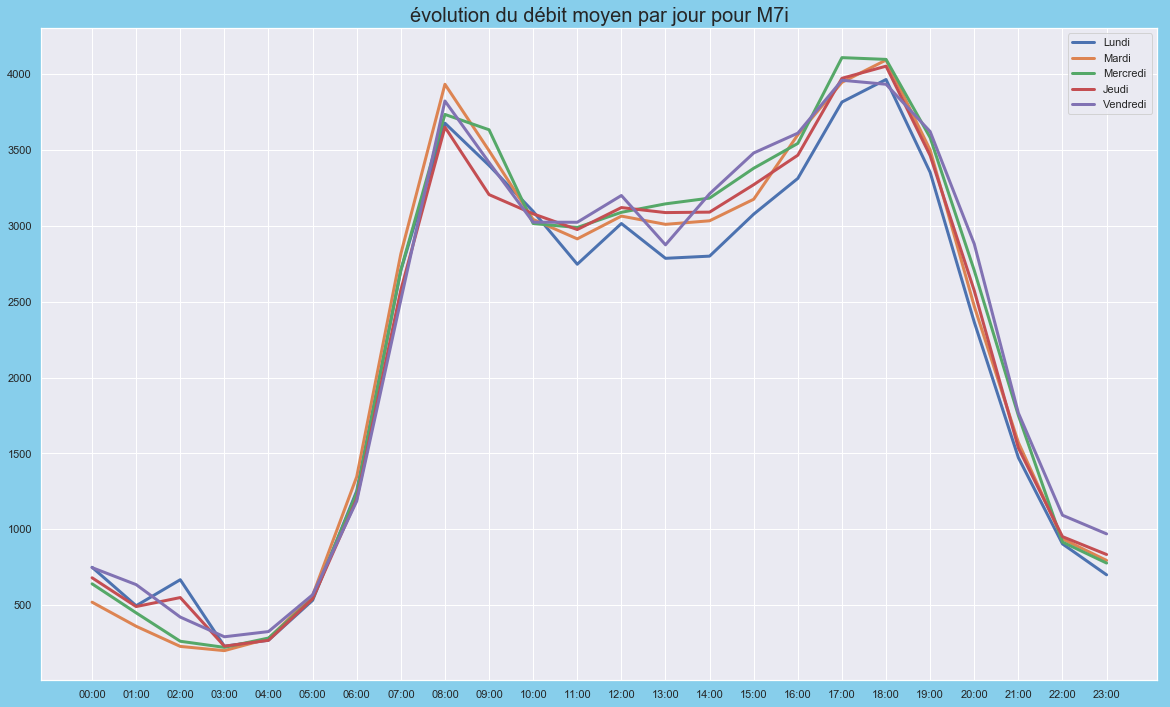

In [328]:
fig, ax = plt.subplots(figsize = (20,12), facecolor='skyblue')
plt.title("évolution du débit moyen par jour pour M7i", fontsize = 20)
line1, = ax.plot(jM7i_moy['hhmm'], LM7i_moy['Q'], linewidth=3, label='Lundi')
line2, = ax.plot(jM7i_moy['hhmm'], MM7i_moy['Q'], linewidth=3, label='Mardi')
line3, = ax.plot(jM7i_moy['hhmm'], MeM7i_moy['Q'], linewidth=3, label='Mercredi')
line4, = ax.plot(jM7i_moy['hhmm'],jM7i_moy['Q'],linewidth=3, label='Jeudi')
line5, = ax.plot(jM7i_moy['hhmm'],VM7i_moy['Q'],linewidth=3, label='Vendredi')
ax.legend()
plt.show()
# hada je vais l'enregistrer et n7eydou men hna

In [72]:
# La moyenne des champs par heure.
jM8k_moy = je_M8k.groupby(['hhmm'], as_index=False).mean()
MeM8k_moy = Me_M8k.groupby(['hhmm'], as_index=False).mean()
LM8k_moy = Lu_M8k.groupby(['hhmm'], as_index=False).mean()
VM8k_moy = Ve_M8k.groupby(['hhmm'], as_index=False).mean()

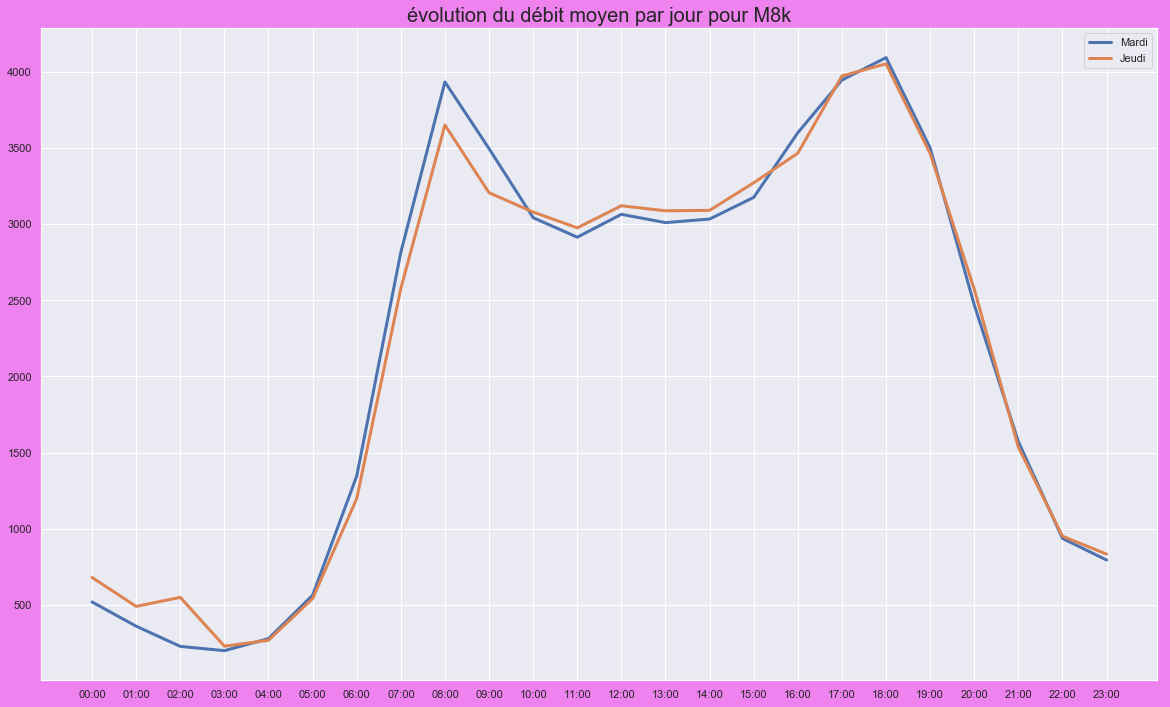

In [73]:
fig, ax = plt.subplots(figsize = (20,12), facecolor='violet')
plt.title("évolution du débit moyen par jour pour M8k", fontsize = 20)
line2, = ax.plot(jM8k_moy['hhmm'], MM8k_moy['Q'], linewidth=3, label='Mardi')
line4, = ax.plot(jM8k_moy['hhmm'],jM8k_moy['Q'],linewidth=3, label='Jeudi')
ax.legend()
plt.show()

# Organisation de données de comptages agrégées à 6 mn :
## Création de la table de données de l’année 2016 :

Comme pour les données agrégées à l'heure, Nous nous organiserons les tables jour à fin d’avoir une table ‘dataframe’ contenant les données de toutes les autoroutes de l’aire métropole Aix-Marseille-Provence en concaténant les données, qui sont représentées sous forme plusieurs tables.

Voici le lien vers les tables de données de janvier jusqu'à Mai 2016, et aussi la table entière sous le nom 'tab16_6m' :


In [2]:
#Importation de la table
table_2016 = pd.read_csv("tab16.csv", sep = ',')
#Lire la table en dataframe
tab16 = pd.DataFrame(table_2016)
tab16.head(4)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,453#M4C,13,380,Ve,01/01/16,00:00,20,240,0,0,...,94,0,0,0,0,NaN,0,1,,NaN
1,454#M4D,13,810,Ve,01/01/16,00:00,20,240,0,0,...,90,0,0,0,0,NaN,0,0,,NaN
2,455#M4E,14,360,Ve,01/01/16,00:00,20,170,0,0,...,86,0,0,0,0,NaN,0,0,,NaN
3,456#M4F,14,845,Ve,01/01/16,00:00,0,0,0,0,...,0,0,0,0,0,NaN,0,0,,NaN


 Avant de commencer le traitement de données nous allons faire quelques modifications sur la table a fin de faciliter les taches. Pour cela nous garderons que les champs utiles pour cette étude :
 
- **rgs :** Code du PME , exemple : 453#M4C.
- **pr :** Point de Repère kilométrique.
- **js :** Jour de la semaine (Lu, Ma, Me, Je, Ve, Sa, Di).
- **jjmmaa :** date formatée (jour mois année ) exemple : 25/12/01.
- **hhmm :**  heure et minute.
- **Qi :** débit moyen  6 minutes par classe de véhicules (i=1 à 6).
- **Vi :** vitesse moyenne 6 minutes en km/h par classe de véhicules (i=1 à 6).
- **To :** Taux d'occupation 6 minutes.

**Remarque :** On prend dans ce qui va suivre Q le trafic total Q = Q1 + ... + Q6.

In [6]:
# J'ai copié la table pour la modifier et garder la table initiale
t16 = tab16.copy()
tab16.columns = ['rgs', 'pr', 'm', 'js', 'jma', 'hhmm', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', '_', 'V1'
                 , 'V2', 'V3', 'V4', 'V5', 'V6', '__', 'Accident','To', 'Qualite', '___']
t16['Q'] = tab16['Q1'] + tab16['Q2'] +tab16['Q3'] +tab16['Q4'] +tab16['Q5'] +tab16['Q6']
lst = ['Q1','Q2','Q3','Q4','Q5','Q6','_','__','___', 'Accident', 'Qualite']
tab6 = t16.drop(lst, 1,errors='ignore')

Pour cette étude on ne garde que la vitesse V2 de la classe 2 des véhicules.

In [7]:
tab6m = tab6.copy()
tab6m['Vitesse'] = tab6['V2']
lst = ['V1','V2','V3','V4','V5','V6']
t6m = tab6m.drop(lst, 1,errors='ignore')
t6m.head()

,rgs,pr,m,js,jma,hhmm,To,Q,Vitesse
0,453#M4C,13,380,Ve,01/01/16,00:00,1,260,94
1,454#M4D,13,810,Ve,01/01/16,00:00,0,260,90
2,455#M4E,14,360,Ve,01/01/16,00:00,0,190,86
3,456#M4F,14,845,Ve,01/01/16,00:00,0,0,0
4,457#M4G,15,373,Ve,01/01/16,00:00,0,0,0


### Les données de trafic sur l'autoroute A7 :
Le code de toutes les stations SIREDO dans l'autoroute A7 commence par 'M7' et 'M8', donc nous gardons dans la table 'df' ques les stations de A7.

In [8]:
#On separe la colonne rgs pour pouvoir lire le code de la station
t6m['A'], t6m['Code'] = t6m['rgs'].str.split('#', 1).str

In [9]:
#Selectionner les codes qui commence par M7 et M8
df1 = t6m[t6m['Code'].str.startswith('M8')]
df2 = t6m[t6m['Code'].str.startswith('M7')]
#Concatener les deux tables
df3 = pd.concat([df2,df1],axis = 0,ignore_index = True)
df3.head()

,rgs,pr,m,js,jma,hhmm,To,Q,Vitesse,A,Code
0,759#M7I,264,687,Ve,01/01/16,00:00,1,340,95,759,M7I
1,760#M7J,265,320,Ve,01/01/16,00:00,3,360,103,760,M7J
2,709#M7i,264,687,Ve,01/01/16,00:00,2,510,99,709,M7i
3,710#M7j,265,320,Ve,01/01/16,00:00,1,290,97,710,M7j
4,764#M7N,267,230,Ve,01/01/16,00:00,0,0,0,764,M7N


In [145]:
#Exporter la table
df3.to_csv('tab_A7_6mn.csv', index = False, encoding = 'utf-8')

Voici le lien vers la table A7 sous le nom de tab_A7_6mn : https://drive.google.com/drive/folders/1Z3MFMvPBtjWzgTjDra2VNLwL7u262uYx

# Qualification des données

## Les données manquantes  :
Les données qualifiées « manquantes » correspondent aux données non
présentes ou « vides ». Dès qu’une des 3 valeurs (Q, V ou TO) est manquante, la mesure
complète est considérée manquante, et dans cet échantillon on en a aucune:

In [80]:
df3.isnull().any()

rgs        False
pr         False
m          False
js         False
jma        False
hhmm       False
To         False
Q          False
Vitesse    False
A          False
Code       False
dtype: bool

## Valeur aberrante et nulle :
**Valeurs extrêmes :**

- Le test de sur-comptage est effectué en comparant chaque débit mesuré à un seuil de débit : à priori **36 véh./6 minutes/voie** qui vaut **360  véh./heure/voie**. 
- Le test de sur-vitesse est effectué en comparant chaque vitesse mesurée à une vitesse limite : à priori **160 km/h**.


**Utilisation de graphiques pour identifier des valeurs aberrantes :**
 
Nous pouvons aussi trouver les derniers résultats des sur-comptage et sur-vitesse en identifiant les valeurs aberrantes par des graphes :
Sur les nuages de points, les points très éloignés des autres sont de possibles valeurs aberrantes. 
En effectuant la commande suivant, on obtient un graphe de nuage :

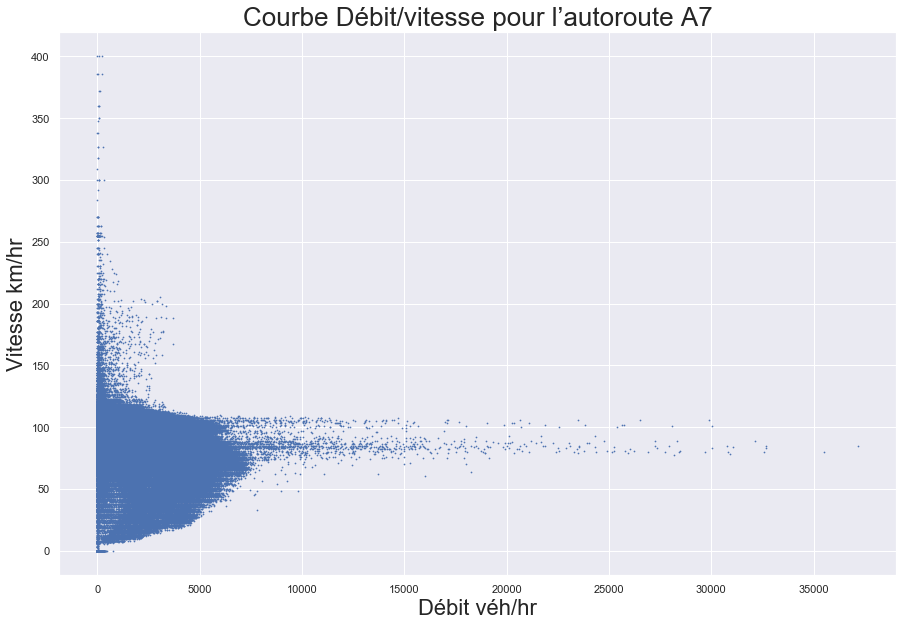

In [10]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df3.Q, df3.Vitesse, s =.5)
plt.title('Courbe Débit/vitesse pour l’autoroute A7',fontsize = 26)
plt.xlabel('Débit véh/hr',fontsize = 22)
plt.ylabel('Vitesse km/hr',fontsize = 22)
plt.show()
fig.savefig('figure5.png')

Ce nuage de points met en évidence des valeurs aberrantes, les points très éloignés des autres sont supérieur 
que 6000 pour le débit et 150 pour la vitesse.
 
En général, les valeurs aberrantes sont plus faciles à repérer sur une boîte à moustaches. Elles sont des valeurs de données très éloignées des autres valeurs de données, et peuvent avoir une incidence importante sur vos résultats.

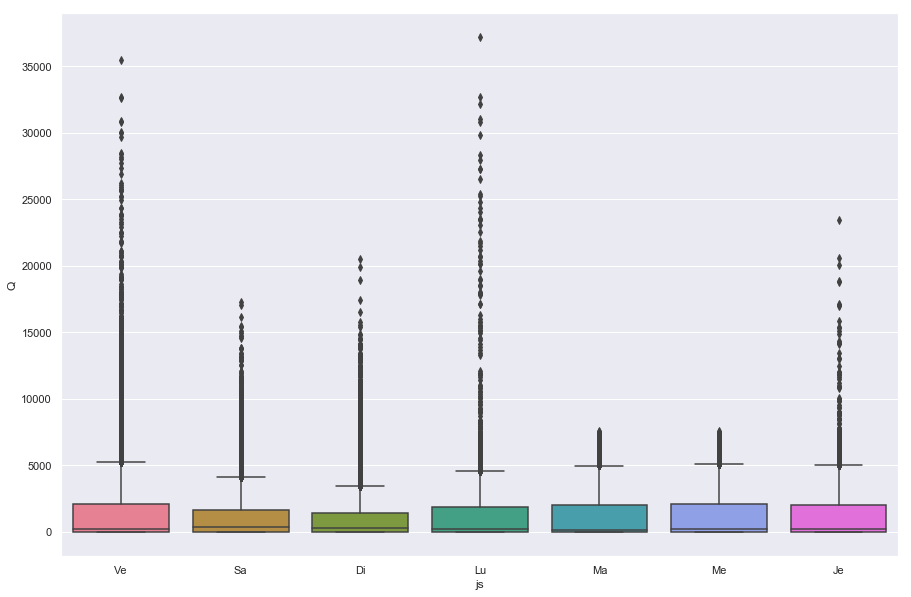

In [11]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x= 'js' , y='Q', data = df3, palette = 'husl')
fig.savefig('figure6.png')

Pour la suite nous allons traiter les données aberrantes, et pour cela on commence par les identifier.

In [10]:
#Identifier les donnees de chaque stations
groupe = df3.groupby('Code')

### Point de mesures : 709#M7i

In [11]:
#Table de donnees de la station M7i
M7i = groupe.get_group('M7i')
#transformer la table en dataframe
M7i = pd.DataFrame(M7i)
M7i.describe()

,pr,m,To,Q,Vitesse
count,33969.0,33969.0,33969.000000,33969.000000,33969.000000
mean,264.0,687.0,13.247991,2129.926403,88.252730
std,0.0,0.0,12.917661,1456.929604,16.011282
min,264.0,687.0,0.000000,0.000000,0.000000
25%,264.0,687.0,3.000000,680.000000,87.000000
50%,264.0,687.0,10.000000,2210.000000,93.000000
75%,264.0,687.0,20.000000,3390.000000,97.000000
max,264.0,687.0,93.000000,6870.000000,161.000000


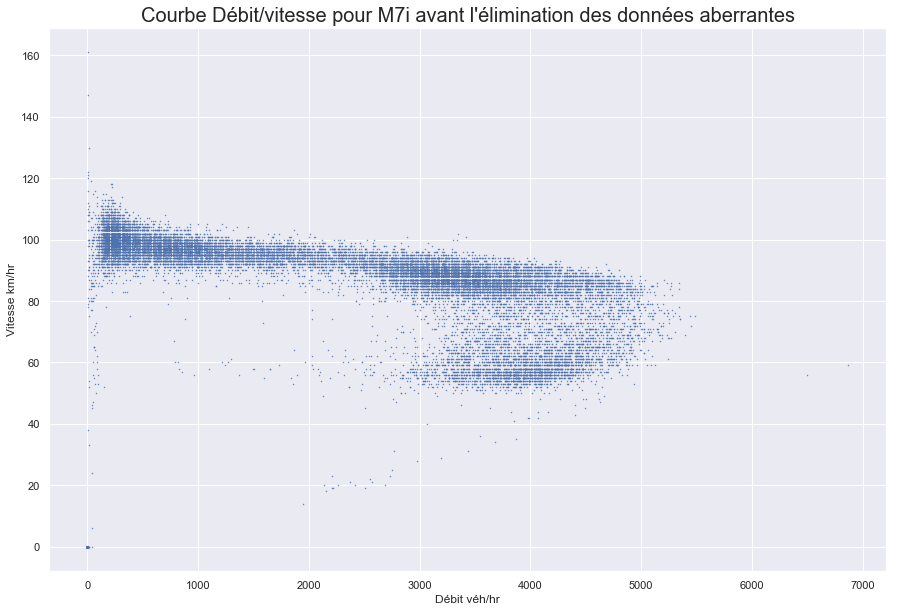

In [18]:
fig = plt.figure(figsize=(15,10))
plt.scatter(M7i.Q, M7i.Vitesse, s =.2)
plt.title("Courbe Débit/vitesse pour M7i avant l'élimination des données aberrantes",fontsize=20)
plt.xlabel('Débit véh/hr')
plt.ylabel('Vitesse km/hr')
plt.show()
fig.savefig('figure8.png')

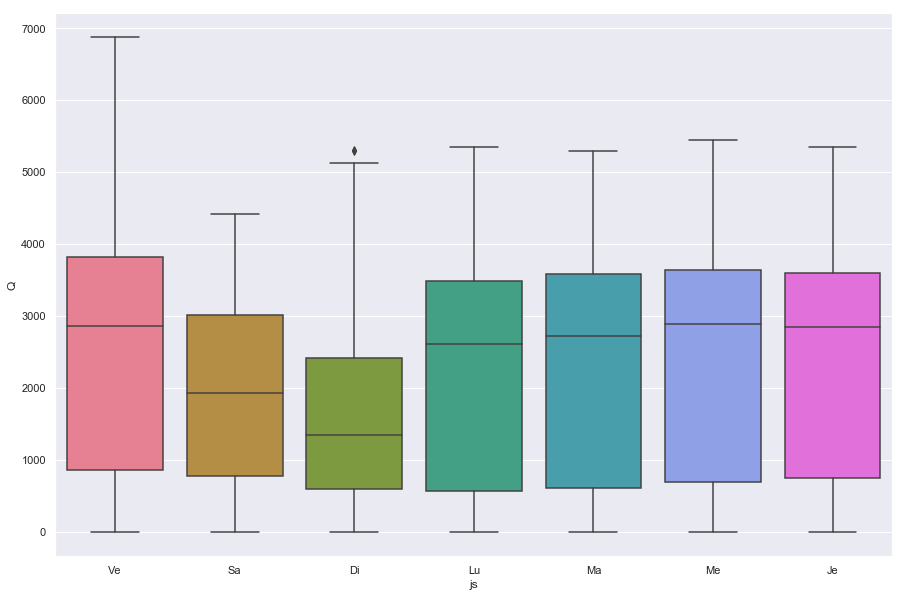

In [15]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot( x= 'js' , y='Q', data = M7i, palette = 'husl')
fig.savefig('figure7.png')

In [12]:
M7i = M7i[~M7i['js'].astype(str).str.startswith('Sa')]
M7i = M7i[~M7i['js'].astype(str).str.startswith('Di')]

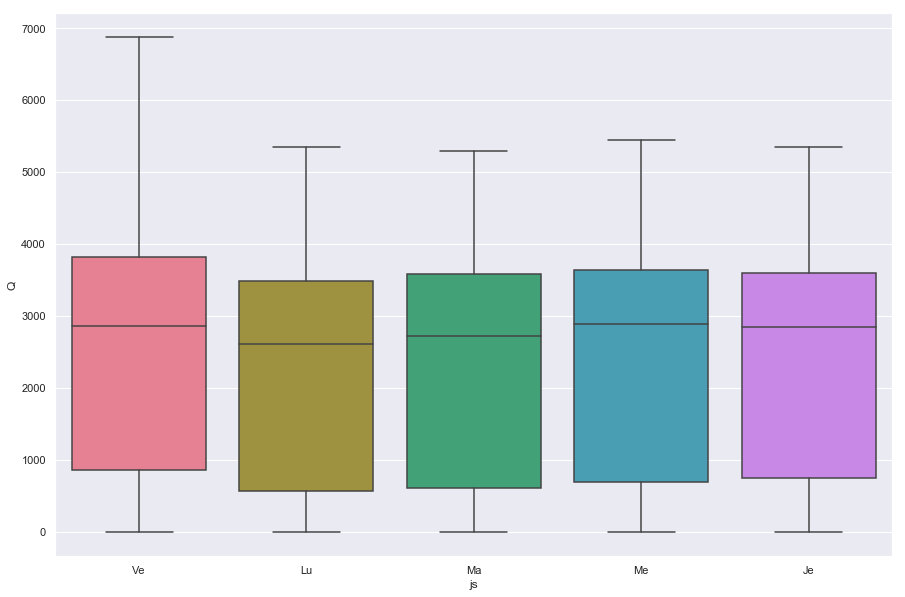

In [17]:
plt.figure(figsize=(15, 10))
sns.boxplot( x= 'js' , y='Q', data = M7i, palette = 'husl')

La valeur centrale du graphique est la médiane. C'est la valeur de la distribution qui sépare les observations en deux sous-échantillons de même taille. On remarque que les données sont asymétriques, la majorité d'entre elles sont situées sur le côté inférieur du graphique, et comme indique le tableu de description ci-dessus la médiane est 2210 veh/mn.

Les largeurs des deux parties de la boîte rendent compte de la dispersion des valeurs situées au centre de l’échantillon (la boîte contient 50% (environ) de l'ensemble des observations : 25% la partie inférieure et 25% la partie supérieure).

Les valeurs à l’extérieur des moustaches sont représentées par des points, qui sont des valeurs de données très éloignées des autres valeurs de données, peuvent être des valeurs aberrantes. En général, les valeurs aberrantes sont plus faciles à repérer sur une boîte à moustaches elles sont indiquées par des astérisques (*). Et on voit bien qu'il y a un seul point de ce type.

Par la suite nous allons calculer la part des données qui depassent le seuil.

In [22]:
### Débit horaire
selection = (M7i['Q'] <= 6000)
q = M7i[selection]
PRC(q)

0.008335069806209627

In [23]:
### Vitesse horaire
selection = (M7i['Vitesse'] <= 160)
v = M7i[selection]
PRC(v) 

0.004167534903104814

In [24]:
### To horaire
selection = (M7i['To'] <= 100)
t = M7i[selection]
PRC(t)

0.0

In [25]:
### Débit et TO incompatibles
selection =  (M7i['Q'] > 5)
qq = M7i[selection]
PRC(qq)

1.89622838091269

In [26]:
### Vitesse horaire
selection = (M7i['Vitesse'] > 0)
vv = M7i[selection]
PRC(vv)

1.9337361950406335

In [27]:
### To horaire
selection = (M7i['To'] > 0)
tt = M7i[selection]
PRC(tt)

5.7511981662846425

In [28]:
selection = (tt['Vitesse'] > 0)
vv = tt[selection]
PRC(vv)

5.755365701187747

##### Résultat :
La part des valeurs extrêmes sont les suivantes:


| **Champs** | **D.extremes**   |
|------|------|
|   **Debit Q** | **1.89%**|
|------|------|
|   **Vitesse**  | **1.93%**|
|------|------|
|   **To**  | **5.75%**|

Donc on peut éliminer les valeurs extrêmes du débit et la vitesse tant qu’ils représentent moins 1.50 % de l’échantillon. Pour le To d’occupation qui représente 4.60 % on les changes par la moyenne. 

In [29]:
# Transformer les donnees a des dataframe
lst = [q,v,t,qq,vv,tt]
for i in lst :
    i = pd.DataFrame(i)
# On change les To nulles par la moyennes
nc = tt['To'].apply(mean)
nc = nc.values
tt['To'] = nc

/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
# Eliminer les valeurs aberrantes
inter1 = pd.merge(q, v, how='inner')
inter2 = pd.merge(t, qq, how='inner')
inter3 = pd.merge(vv, tt, how='inner')
inter4 = pd.merge(inter1, inter2, how='inner')
tab_M7i = pd.merge(inter3, inter4, how='inner')
tab_M7i.describe()

,pr,m,To,Q,Vitesse
count,22674.0,22674.0,22674.000000,22674.000000,22674.000000
mean,264.0,687.0,16.645144,2438.975037,86.955500
std,0.0,0.0,14.138722,1488.668693,13.508025
min,264.0,687.0,1.000000,40.000000,6.000000
25%,264.0,687.0,4.000000,860.000000,84.000000
50%,264.0,687.0,16.000000,2930.000000,90.000000
75%,264.0,687.0,23.000000,3680.000000,96.000000
max,264.0,687.0,93.000000,5490.000000,118.000000


Pour les données 6 minutes, on les traite sur les jours ouvrés, donc on élimine les données du week-end.

In [31]:
tab_M7i = tab_M7i[~tab_M7i['js'].astype(str).str.startswith('Sa')]
tab_M7i = tab_M7i[~tab_M7i['js'].astype(str).str.startswith('Di')]

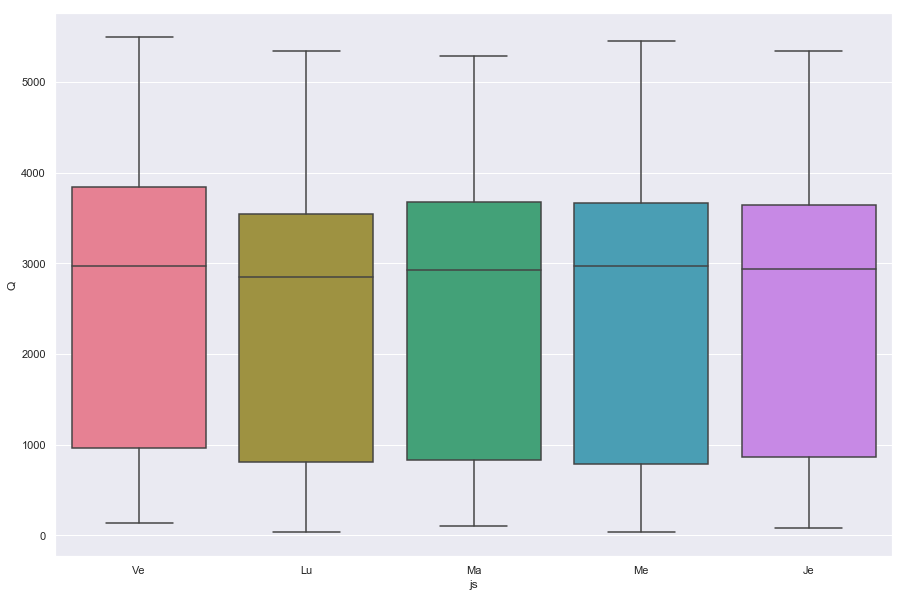

In [31]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot( x= 'js' , y='Q', data = tab_M7i, palette = 'husl')
fig.savefig('figure10.png')

# Analyse du diagramme fondamental

Nous avons vu plus haut les définitions d’un certain nombre de grandeurs relatives au trafic et auussi de la concentration ou la densité $K$ (nombre de véhicules présents à un instant sur une longueur de route donnée).

Pour ajouter la concentration nous servons de l’équation suivante : $K = Q/V$.
Ces trois variables sont reliées par la relation $Q = K \times V$.

La concentration $K$ est inversement proportionnelle à la vitesse, en effet, plus la vitesse est élevée plus la concentration est faible.

In [33]:
# Ajouter le champs de Concentration K
tab_M7i['K'] = (tab_M7i['Q'])/(tab_M7i['Vitesse'])
#Trier la table par heure.
tab_M7i = tab_M7i.sort_values(by = 'hhmm')
tab_M7i.describe()

,pr,m,To,Q,Vitesse,K
count,22674.0,22674.0,22674.000000,22674.000000,22674.000000,22674.000000
mean,264.0,687.0,16.645144,2438.975037,86.955500,31.115019
std,0.0,0.0,14.138722,1488.668693,13.508025,22.343376
min,264.0,687.0,1.000000,40.000000,6.000000,0.869565
25%,264.0,687.0,4.000000,860.000000,84.000000,8.865979
50%,264.0,687.0,16.000000,2930.000000,90.000000,33.200683
75%,264.0,687.0,23.000000,3680.000000,96.000000,46.049383
max,264.0,687.0,93.000000,5490.000000,118.000000,139.285714


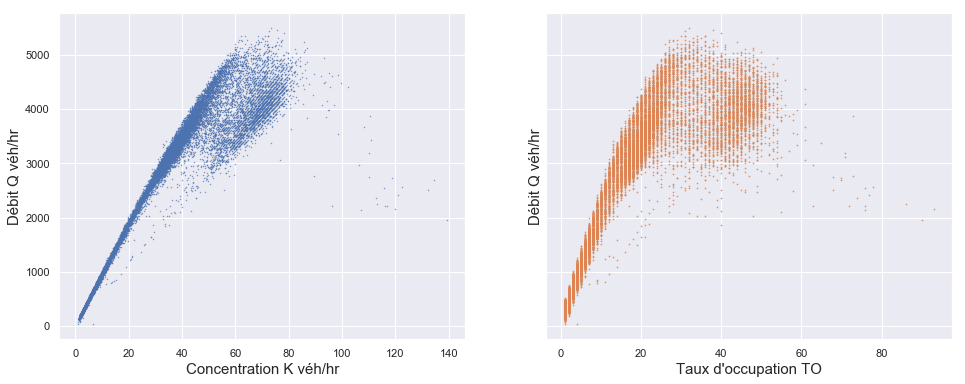

In [34]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6), sharey=True)
a = sns.regplot(x= tab_M7i['K'], y=tab_M7i['Q'], fit_reg=False,scatter_kws={'s':.2}, ax=axs[0])
a.set_ylabel("Débit Q véh/hr",fontsize=15)
b = sns.regplot(x= tab_M7i['To'], y=tab_M7i['Q'], fit_reg=False,scatter_kws={'s':.5}, ax=axs[1])
b.set_xlabel("Taux d'occupation TO",fontsize=15)
b.set_ylabel("Débit Q véh/hr",fontsize=15)
a.set_xlabel("Concentration K véh/hr",fontsize=15)
#fig.suptitle("Diagramme de niveau de service, Q=f(K) et Q=f(To) pour M7i", fontsize=20)
fig.savefig('figure11.png')

On voit bien que les deux graphe se ressemblent donc **la concentration alors est liée au taux d’occupation $To$**
et présenter le débit $Q$ en fonction de la concentration $K$ revient a le représenter par le taux d’occupation $To$.

 Le taux d’occupation $To$ est lié à la concentration $K$ par la relation suivante :
$$To = (L + l) K.$$

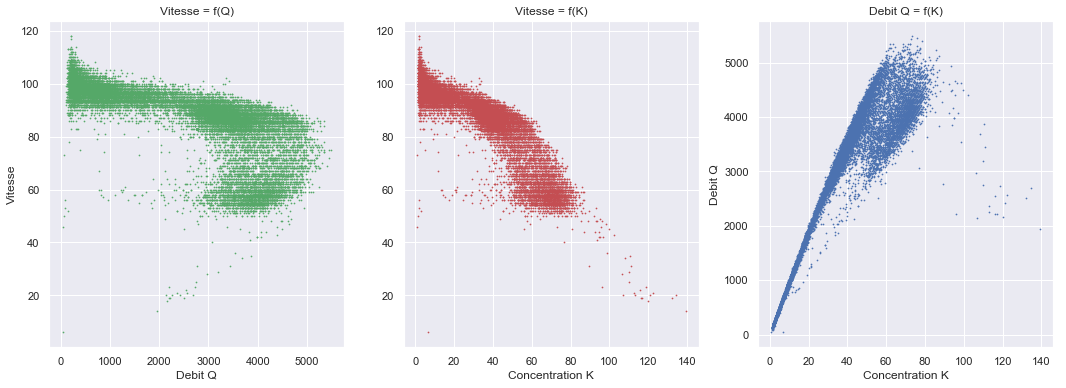

In [35]:
fig = plt.figure(figsize=(18,6))
#AXES
ax1 = fig.add_subplot(131); ax2 = fig.add_subplot(132); ax3 = fig.add_subplot(133)

#Data
ax1.scatter(tab_M7i['Q'], tab_M7i['Vitesse'], s=.5, c='g', marker="o")
ax2.scatter(tab_M7i['K'], tab_M7i['Vitesse'], s=.5, c='r', marker="o")
ax3.scatter(tab_M7i['K'], tab_M7i['Q'], s=.5, c='b', marker="o")

#Labels
ax1.set_xlabel('Debit Q'); ax1.set_ylabel('Vitesse')
ax2.set_xlabel('Concentration K'); #fig.suptitle("Diagramme de niveau de service pour M7i", fontsize=20)
ax3.set_xlabel('Concentration K'); ax3.set_ylabel('Debit Q')
ax3.set_title('Debit Q = f(K)'); ax2.set_title('Vitesse = f(K)'); ax1.set_title('Vitesse = f(Q)')
plt.show()
fig.savefig('figure12.png')

La concentration critique $K_{cr}= 75 v/h$ qui correspond au débit maximal $Q_{max}= 5000 véh/h$.

**Régression linéaire :**

Déterminer les coefficients du modèle linéaire, pour la courbe (K-Q).

In [37]:
# recuperer la premiere partie de la courbe (Debit-Concentration)
tabreg1 = tab_M7i[(tab_M7i['K'] <= 75)]

In [188]:
import statsmodels.api as sm
x1= sm.add_constant(tabreg1['K'])
reg1 = sm.OLS(tabreg1['Q'], x1).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.207e+05
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:19:17   Log-Likelihood:            -1.6693e+05
No. Observations:               22201   AIC:                         3.339e+05
Df Residuals:                   22199   BIC:                         3.339e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        416.5946      5.171     80.565      0.0

- D'après le résultat de la régression linéaire simple, le modèle est bien ajusté puisque la variance expliquée (R-squared) par le modèle dépasse 90% et la variable est significatif dans le modèle car la P-value est presque nulle.
- Les coefficients :  $\alpha = 77.89$ et $\beta = 199.05$.

In [38]:
tabreg2 = tab_M7i[(tab_M7i['K'] > 75)]

In [185]:
tab2= sm.add_constant(tabreg2)
x2= sm.add_constant(tabreg2['K'])
reg2 = sm.OLS(tabreg2['Q'], x2).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     300.8
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.81e-52
Time:                        10:18:59   Log-Likelihood:                -3489.1
No. Observations:                 473   AIC:                             6982.
Df Residuals:                     471   BIC:                             6991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7182.4755    162.406     44.225      0.0

- Les coefficients :  $\alpha = 5.6051$ et $\beta = 3796.72$.

/Users/mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mac/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


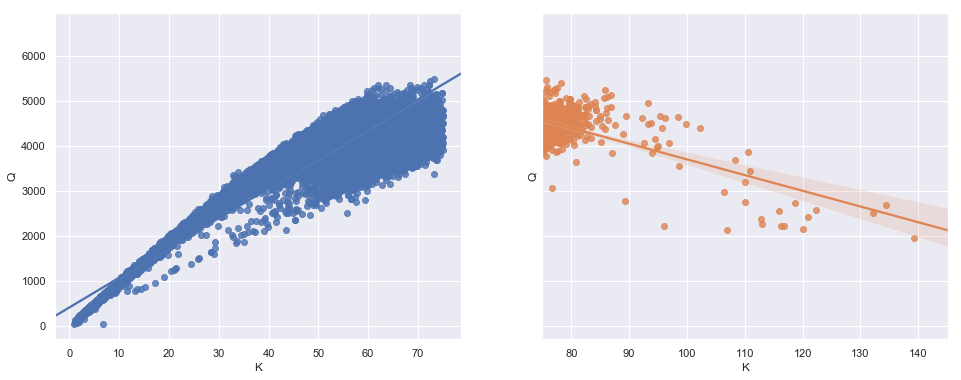

In [39]:
fig, ax =plt.subplots(1,2 , figsize=(16,6), sharey=True)
sns.regplot(x='K', y='Q', data=tabreg1, ax=ax[0])
sns.regplot(x='K', y='Q', data=tabreg2, ax=ax[1])
ax[1].set_xlim(75,)
fig.show()
fig.savefig('figure19.png')

Text(0.5, 1.0, 'Diagramme de niveaux de service Vitesse = f(Q) pour la station M7i')

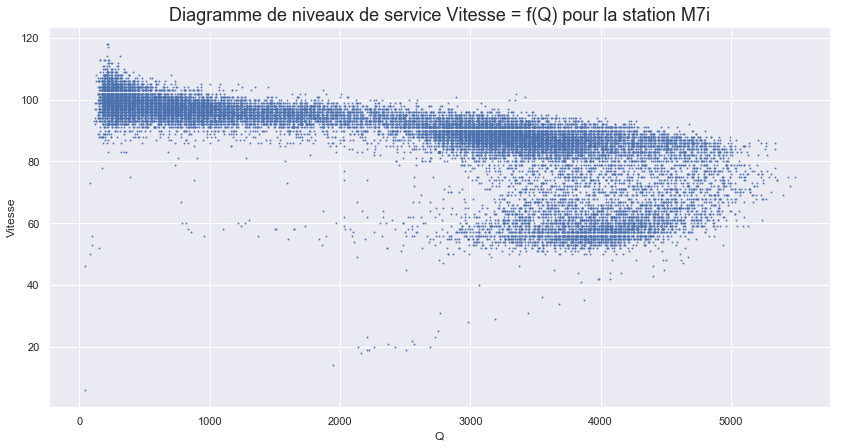

In [208]:
plt.figure(figsize=(14, 7))
sns.regplot(x= tab_M7i['Q'], y=tab_M7i['Vitesse'], scatter_kws={'s':1}, fit_reg=False)
plt.title('Diagramme de niveaux de service Vitesse = f(Q) pour la station M7i',fontsize = 18)

In [81]:
#plt.figure(figsize=(14, 7))
#p2 = polyfit(tab_M7i['Q'] ,tab_M7i['Vitesse'] ,2)
#plot(tab_M7i['Q'],tab_M7i['Vitesse'], 'o', markersize=1 )
#plot(tab_M7i['Q'], polyval(p2,tab_M7i['Q']))

Ici on remarque que $V_{max} = 115 km/h $ correspond a un debit faible de $300 v/h$ et la vitesse critique $V_{cr}= 75 km/h$ correspondant au débit maximal $5400 v/h$.

# Niveaux de Service de Circulation (NSC) :
 ## Le concept du NSC :
 Le niveau de service d'une infrastructure est un concept global qui permet de classifier les conditions de circulation que rencontrent les usagers de l'ensemble de la chaussée pour un sens de circulation donné. Les critères discriminants pour classifier les niveaux de service sont non seulement la vitesse, mais aussi la distance séparant les véhicules. Ces deux derniers facteurs sont intimement liés à la concentration des véhicules sur la chaussée, donc au taux d'occupation. D'une manière générale, le Niveau de Service de Circulation (NSC) d'une route est une mesure qualitative de l'effet d'un grand nombre de paramètres qui combinent :
-	Des objectifs individuels comme la vitesse et le temps de parcours, les interruptions de trafic, la liberté de manœuvre, la sécurité, le confort, la commodité de conduite.
-	Des objectifs collectifs comme le rendement, les coûts d'exploitation, la pollution, le bruit, la congestion, les économies d'énergie.

Parmi les facteurs à prendre en considération pour évaluer le NSC, on citera:
- La vitesse et le temps du parcours (y compris leur régularité).
- Les interruptions ou contraintes de la circulation.
- la sécurité.
- le confort et l'aisance de la conduite.
- L'économie.
- L'environnement.
- la réglementation.

Idéalement, il serait souhaitable que tous ces facteurs soient utilisés dans l'évaluation d'un NSC. Mais on ne dispose pas de méthodologie adéquate pour déterminer les valeurs ou l'importance relative de certains des 7 facteurs énumérés.

Les NSC sont souvent définie par des valeurs limites de vitesse et de débit. On considère que ces 2 paramètres sont intimement corrélés aux autres paramètres plus subjectifs comme le confort de conduite, la liberté de manœuvre … On recommande souvent l’utilisation de quatre niveaux pour caractériser les conditions de circulation des voies rapides dans des conditions variées de vitesse et débit (NSC1 a NSC4).

 L’ordre des quatre niveaux de service correspond à une progression dans le niveau d’encombrement de la route et parallèlement a une décroissance de la vitesse moyenne de parcours. Les quatre NSC sont :
-	**NSC 1 :** trafic fluide.
-	**NSC 2 :** trafic de fluide a dense.
-	**NSC 3 :** trafic dense.
-	**NSC 4 :** trafic saturé.

## Détermination de la capacité :

**La capacité $C$ :** La capacité nominale est définie comme le nombre maximal de véhicules pouvant être écoulé pendant un intervalle de temps de référence dans des conditions de circulation : circulation continue, sans incident, chaussée sèche… Et la capacité pratique en un point de repère est définie comme le nombre maximal de véhicules écoulé pendant un intervalle de temps.
On préconise de retenir la capacité comme étant la valeur correspondant au quantile 75 de la distribution des débits des heures de pointe, journalières retenues, du matin et du soir.

In [82]:
# L'heure de pointe du matin
cond1 = tab_M7i.apply ( lambda row : row["hhmm"] > '07:54', axis = 1 )
cond2 = tab_M7i.apply ( lambda row : row["hhmm"] < '09:06', axis = 1 )
# L'intersection des deux condition.
inter1 = pd.merge(tab_M7i [cond1], tab_M7i [cond2], how='inner'); inter1.describe()

,pr,m,To,Q,Vitesse,K
count,1079.0,1079.0,1079.000000,1079.000000,1079.000000,1079.000000
mean,264.0,687.0,42.083411,3684.865616,59.058387,64.182747
std,0.0,0.0,10.120539,650.348811,9.399864,13.726979
min,264.0,687.0,1.000000,80.000000,45.000000,1.600000
25%,264.0,687.0,41.000000,3560.000000,55.000000,61.833333
50%,264.0,687.0,45.000000,3840.000000,57.000000,68.000000
75%,264.0,687.0,47.000000,4050.000000,59.000000,71.851852
max,264.0,687.0,65.000000,4830.000000,101.000000,87.647059


In [83]:
# L'heure de pointe du soir
cond3 = tab_M7i.apply ( lambda row : row["hhmm"] > '17:54', axis = 1 )
cond4 = tab_M7i.apply ( lambda row : row["hhmm"] < '18:06', axis = 1 )
# L'intersection des deux condition.
inter2 = pd.merge(tab_M7i [cond3], tab_M7i [cond4],how='inner')
inter2.describe()

,pr,m,To,Q,Vitesse,K
count,98.0,98.0,98.000000,98.000000,98.000000,98.000000
mean,264.0,687.0,25.244898,4127.346939,81.387755,52.410557
std,0.0,0.0,9.570209,548.145046,11.992809,13.299619
min,264.0,687.0,9.000000,2010.000000,29.000000,22.087912
25%,264.0,687.0,20.000000,3870.000000,79.000000,43.863788
50%,264.0,687.0,22.500000,4185.000000,86.000000,49.507702
75%,264.0,687.0,27.000000,4500.000000,89.000000,56.371874
max,264.0,687.0,71.000000,5240.000000,93.000000,110.000000


Donc pour la première heure de pointe (8h-9h) la valeur correspondant au quantile 75 est de : 3947 v/h et pour la deuxième heure de pointe (17h-18h) la valeur est de : 4330 v/h.
On considère alors la capacité comme étant la moyenne de ces deux valeurs.
On retient alors pour la station M7i : $$ C = 4138,5 v/h. $$


In [84]:
C = 4138.5

In [85]:
tab_M7i.describe()

,pr,m,To,Q,Vitesse,K
count,22674.0,22674.0,22674.000000,22674.000000,22674.000000,22674.000000
mean,264.0,687.0,16.645144,2438.975037,86.955500,31.115019
std,0.0,0.0,14.138722,1488.668693,13.508025,22.343376
min,264.0,687.0,1.000000,40.000000,6.000000,0.869565
25%,264.0,687.0,4.000000,860.000000,84.000000,8.865979
50%,264.0,687.0,16.000000,2930.000000,90.000000,33.200683
75%,264.0,687.0,23.000000,3680.000000,96.000000,46.049383
max,264.0,687.0,93.000000,5490.000000,118.000000,139.285714


## Détermination des seuils de discrémination des NSC :

En pratique, on s'appuie sur la courbe du diagramme fondamental reliant le débit à la vitesse $Q/V$ pour déterminer les seuils de discrimination des NSC. Il s'agit de déterminer 3 seuils de vitesse ($V_{1}$, $V_{2}$ et $V_{3}$) qui séparent le diagramme $Q/V$ en quatre zones correspondant chacune à un niveau de service:
- $V_{1}= 53 km/h$.
- $V_{2}= 89 km/k$.
- $V_{3}= 98 km/k$.

 On utilise des seuils de débit pour déterminer ces trois seuils de vitesse. Les seuils de débit retenus sont:
- $Q/C =$ 60% $= 0.60$ de la capacité correspond au $V_{1}$(Vitesses élevées).
- $Q/C =$ 75% $= 0.75$ de la capacité correspond au $V_{2}$(Stable).
- $Q/C =$ 90% $= 0.9$ de la capacité correspond au $V_{3}$(Vitesses basses).
- $Q/C =$ 100% $= 1$ de la capacité correspond superieur a $V_{3}$(Instable).


| **NSC** | **La concentration K**| **Q/C**| **Vitesse pratiquée**| **Le débit Q**|**Caractéristique des NSC**|
|------|------|------|------|------|------|
|   **NSC 1** | $ \leq 37$|$0.75$| $\geq 98 km/h$|$3676 v/h$|Fluide|
|------|------|------|------|------|------|
|   **NSC 2**  | $ \leq 47$|$0.85$| $ \geq 89 km/h$|$4165 v/h$|trafic de fluide a dense|
|------|------|------|------|------|------|
|   **NSC 3**  | $ \leq 80$|$0.9$| $ \geq 53 km/h$|$4410 v/h$|trafic dense|
|------|------|------|------|------|------|
|   **NSC 4**  | $ > 80$|$1$| $ < 53 km/h$|variable|trafic saturé|


In [60]:
# NSC 1 : trafic fluide.
NSC1 = tab_M7i[(tab_M7i['K'] <= 37)]

In [61]:
# NSC 2 : trafic de fluide a dense.
NSC2 = tab_M7i[(tab_M7i['K'] <= 47) & (tab_M7i['K'] > 37)]

In [62]:
# NSC 3 : trafic dense.
NSC3 = tab_M7i[(tab_M7i['K'] <= 80) & (tab_M7i['K'] > 47)]

In [63]:
# NSC 4 : trafic saturé.
NSC4 = tab_M7i[(tab_M7i['K'] > 80)]

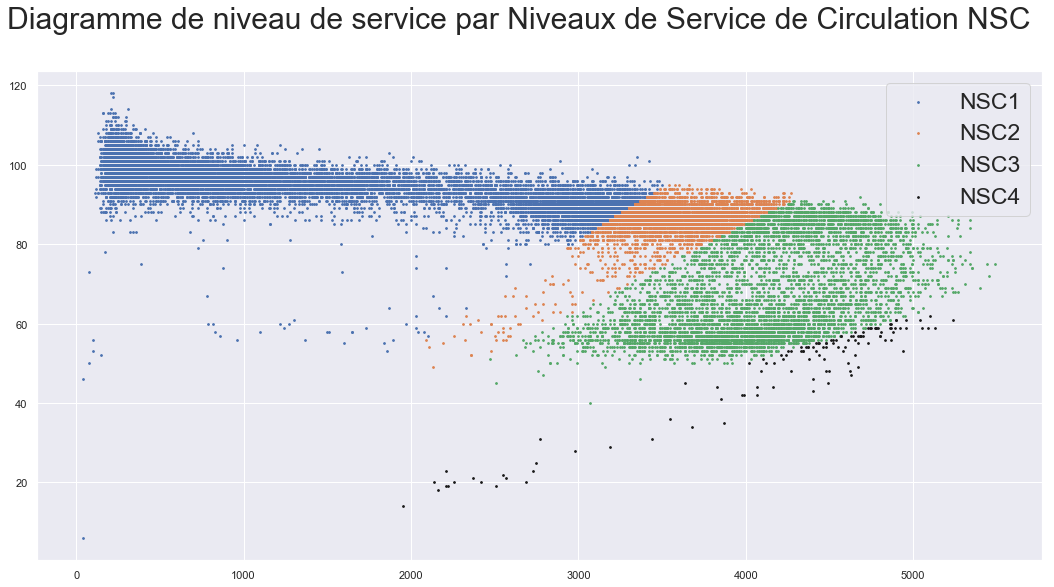

In [64]:
import pylab as plot

fig = plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(111)
ax1.scatter(NSC1['Q'], NSC1['Vitesse'], s=3, label='NSC1')
ax1.scatter(NSC2['Q'], NSC2['Vitesse'], s=3, label='NSC2')
ax1.scatter(NSC3['Q'], NSC3['Vitesse'], s=3, label='NSC3')
ax1.scatter(NSC4['Q'], NSC4['Vitesse'], s=3, c = 'k', label='NSC4')
fig.suptitle('Diagramme de niveau de service par Niveaux de Service de Circulation NSC ', fontsize=30)
plt.legend(loc='upper right',prop={'size': 23});
plt.show()
fig.savefig('V=fQ_M7i_NSC.png')

Ainsi, pour chaque niveau, on peut déterminer la répartition temporelle des niveaux de service par les formules suivantes :
-	$ NSC1 = (n_{1} \times 100)/ N.$
-	$ NSC2 = (n_{2}\times 100)/ N.$
-	$ NSC3 = (n_{3} \times 100)/ N.$
-	$ NSC4 = (n_{4} \times 100)/ N.$

Avec N le nombre total d'observation de la table de la station M7i, et $n_{i}$ le nombre d'observation du niveau $NSCi$. Alors on a :
- $N= 22674$.
- $n_{1} = 10594$, $n_{2} = 3225$, $n_{3} = 7426$ et $n_{4} = 1429$.

In [228]:
# Verifier que la somme des longueurs des 4 tables  = la longueur de la table initiale
1429+7426+3225+10594 == len(tab_M7i)

True

In [57]:
# Creer une fonction pour déterminer la répartition des NSC. 
def prc(a,b):
    return (len(a)*100)/ len(b)

In [58]:
liste = [NSC1, NSC2, NSC3, NSC4]
for i in liste:
    print (prc(i,tab_M7i))

58.49872100202875
17.52668254388286
23.692334832848196
0.282261621240187


Ou bien on peut les déterminer par le diagramme en camembert (Pie Chart).

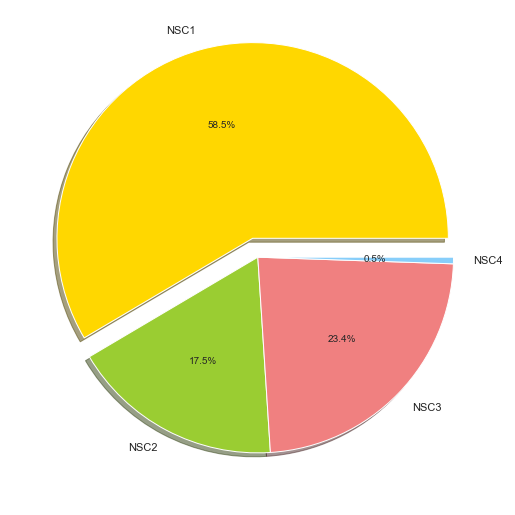

In [65]:
# Data to plot
labels = 'NSC1', 'NSC2', 'NSC3', 'NSC4'
sizes = [len(NSC1), len(NSC2), len(NSC3), len(NSC4)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.figure(figsize=(13, 9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.show()

## Création de Dataframe :  
Pour visualiser une répartition des niveaux de service, il faut créer une Dataframe qui contient la répartition des 4 niveaux NSC dans une période de 6 minutes donnée. Et pour cela nous commencons par déterminer, pour une période d’observation i donnée et pour chaque séquence de 6mn, le niveau de service correspondant par l’identification de la zone dans la laquelle se trouve le point $(V_{i},Q_{i})$(chaque observation) a une modalité de NSC parmis les modalités suivantes : [NSC1, NSC2, NSC3, NSC4], et apres regrouper les données de 6mn en des données par heure.


**Table modalité avec 4 colonnes de NSC:**

In [43]:
m1=[]; m2=[]; m3=[]; m4=[]

In [44]:
t=tab_M7i.values

In [45]:
#remplir la liste par des modalites
for i in range(len(tab_M7i)):
    if (t[i,11] <= 31):
        m1.append(1)
    else:
        m1.append(0)

In [46]:
for i in range(len(tab_M7i)):
    if (31 < t[i,11]<= 38):
        m2.append(1)
    else:
        m2.append(0)

In [47]:
for i in range(len(tab_M7i)):
    if (38 < t[i,11]<= 69):
        m3.append(1)
    else:
        m3.append(0)

In [48]:
for i in range(len(tab_M7i)):
    if (t[i,11] > 69):
        m4.append(1)
    else:
        m4.append(0)

In [49]:
# Contient les modalites qu'on doit ajouter.
f1 = pd.DataFrame({'NSC1':m1})
f2 = pd.DataFrame({'NSC2':m2})
f3 = pd.DataFrame({'NSC3':m3})
f4 = pd.DataFrame({'NSC4':m4})
len(f4) == len(tab_M7i)

True

In [50]:
tab_M7i.head()

,rgs,pr,m,js,jma,hhmm,To,Q,Vitesse,A,Code,K
0,709#M7i,264,687,Ve,01/01/16,00:00,2,510,99,709,M7i,5.151515
1609,709#M7i,264,687,Ve,08/01/16,00:00,2,510,100,709,M7i,5.100000
24973,709#M7i,264,687,Je,28/04/16,00:00,2,710,102,709,M7i,6.960784
24736,709#M7i,264,687,Me,27/04/16,00:00,3,680,98,709,M7i,6.938776
24512,709#M7i,264,687,Ma,26/04/16,00:00,3,640,97,709,M7i,6.597938


In [51]:
result1 = pd.concat([tab_M7i, f1, f2, f3, f4], axis=1)
len(result1)
dff = result1[0:22324]; dff.head()

,rgs,pr,m,js,jma,hhmm,To,Q,Vitesse,A,Code,K,NSC1,NSC2,NSC3,NSC4
0,709#M7i,264.0,687.0,Ve,01/01/16,00:00,2.0,510.0,99.0,709,M7i,5.151515,1.0,0.0,0.0,0.0
1,709#M7i,264.0,687.0,Ve,01/01/16,00:06,1.0,310.0,95.0,709,M7i,3.263158,1.0,0.0,0.0,0.0
2,709#M7i,264.0,687.0,Ve,01/01/16,00:12,1.0,230.0,99.0,709,M7i,2.323232,1.0,0.0,0.0,0.0
3,709#M7i,264.0,687.0,Ve,01/01/16,00:18,1.0,380.0,93.0,709,M7i,4.086022,1.0,0.0,0.0,0.0
4,709#M7i,264.0,687.0,Ve,01/01/16,00:24,2.0,620.0,94.0,709,M7i,6.595745,1.0,0.0,0.0,0.0


**Table modalité avec une seule colonne :**

In [116]:
# Creer une liste vide
d=[]

In [117]:
tab=tab_M7i.values
tab

array([['709#M7i', 264, 687, ..., '709', 'M7i', 5.151515151515151],
       ['709#M7i', 264, 687, ..., '709', 'M7i', 5.1],
       ['709#M7i', 264, 687, ..., '709', 'M7i', 6.96078431372549],
       ...,
       ['709#M7i', 264, 687, ..., '709', 'M7i', 5.729166666666667],
       ['709#M7i', 264, 687, ..., '709', 'M7i', 5.052631578947368],
       ['709#M7i', 264, 687, ..., '709', 'M7i', 4.368932038834951]],
      dtype=object)

In [118]:
#remplir la liste par des modalites
for i in range(len(tab_M7i)):
    if (tab[i,11] <= 31):
        d.append(1)

In [119]:
for i in range(len(tab_M7i)):
    if (31 < tab[i,11]<= 38):
        d.append(2)

In [120]:
for i in range(len(tab_M7i)):
    if (38 < tab[i,11]<= 69):
        d.append(3)

In [121]:
for i in range(len(tab_M7i)):
    if (tab[i,11] > 69):
        d.append(4)

In [122]:
# Contient les modalites qu'on doit ajouter.
f = pd.DataFrame({'NSC':d})
type(f)

pandas.core.frame.DataFrame

In [123]:
# reordonner les lignes.
s = pd.Series(range(len(tab_M7i)))
tab_M7i = tab_M7i.set_index([s])

In [124]:
print (len(d) == len(tab_M7i))

True


'd' a la même longueur que tab_M7i, et aussi du  même type ce qui permet a les concatener.

In [125]:
result = pd.concat([tab_M7i, f], axis=1)
len(result)

22674

In [126]:
df = result[0:22323]
df.head()

,rgs,pr,m,js,jma,hhmm,To,Q,Vitesse,A,Code,K,NSC
0,709#M7i,264,687,Ve,01/01/16,2019-03-31,2,510,99,709,M7i,5.151515,1
1,709#M7i,264,687,Ve,08/01/16,2019-03-31,2,510,100,709,M7i,5.100000,1
2,709#M7i,264,687,Je,28/04/16,2019-03-31,2,710,102,709,M7i,6.960784,1
3,709#M7i,264,687,Me,27/04/16,2019-03-31,3,680,98,709,M7i,6.938776,1
4,709#M7i,264,687,Ma,26/04/16,2019-03-31,3,640,97,709,M7i,6.597938,1


**'Datetime' Library :**
on souhaite manipuler des temps, et pour cela nous allons utilisez la librairie 'Datetime', qui propose plusieurs classes pour représenter et gérer des dates et heures. Et la on a juste besoin des heures et minutes puis on va rassembler les 6min en une heure en appliquant la moyenne des valeurs.

In [127]:
# convertir to datetime
import datetime
tab_M7i['hhmm'] = pd.to_datetime(tab_M7i['hhmm'])
# Set the datetime column as the index
tab_M7i.index = tab_M7i['hhmm']

Pour rassembler les observations on fait les etapes suivantes:

In [128]:
df = tab_M7i.resample('1H').mean()
len(df)

24

In [129]:
df['hhmm'] = df.index  
df

,pr,m,To,Q,Vitesse,K,hhmm
hhmm,,,,,,,
2019-03-31 00:00:00,264.0,687.0,1.717272,463.784378,99.547855,4.671586,2019-03-31 00:00:00
2019-03-31 01:00:00,264.0,687.0,1.155396,287.366906,100.293525,2.874192,2019-03-31 01:00:00
2019-03-31 02:00:00,264.0,687.0,1.098993,245.721477,100.179530,2.462506,2019-03-31 02:00:00
2019-03-31 03:00:00,264.0,687.0,1.340120,302.910180,99.209581,3.100090,2019-03-31 03:00:00
2019-03-31 04:00:00,264.0,687.0,2.382934,536.243496,96.883455,5.549021,2019-03-31 04:00:00
2019-03-31 05:00:00,264.0,687.0,6.002090,1205.026123,94.494253,12.810122,2019-03-31 05:00:00
2019-03-31 06:00:00,264.0,687.0,14.946281,2548.295455,88.583678,30.015003,2019-03-31 06:00:00
2019-03-31 07:00:00,264.0,687.0,39.985597,3997.695473,63.032922,65.476207,2019-03-31 07:00:00
2019-03-31 08:00:00,264.0,687.0,42.122200,3702.861507,59.092668,64.461710,2019-03-31 08:00:00


Dour pour l'A7 le  niveau  de  service  généralisé  indique un  trafic  saturé  entre  7h  et  8h.  La  vitesse  moyenne  est  inférieure à $80 km/h$ entre 16h et 18h et supérieur à $95 km/h$ entre 20h et 23h. 

| **Plage** | **Vitesse généralisée**| **NSC généralisé**|**Caractéristique des NSC**|
|------|------|------|------|
|   07h-09h | $61 km/h$|NSC3|trafic dense|
|------|------|------|------|
|   12h-13h  |$88 km/h$ |NSC2|trafic de fluide a dense|
|------|------|------|------|
|   14h-18h | $80 km/h$|NSC3|trafic dense|
|------|------|------|------|
|   18h-19h  | $84 km/h$|NSC2|trafic de fluide a dense|
|------|------|------|------|
|   20h-23h   | $96 km/h$|NSC1| Fluide|
|------|------|------|------|
|   00h-06h | $98.33 km/h$|NSC3|trafic fluide|

In [104]:
l2.head()

,00:36,20:18,00:18,00:48,07:12,00:00,08:06,08:48,08:36,07:06,...,10:30,13:12,13:06,12:48,11:06,13:00,11:12,12:54,13:18,09:48
hhmm,1,1,1,1,1,1,1,1,1,1,...,60,61,61,63,64,64,65,66,70,107


In [105]:
result1 = pd.concat([l1, l2], ignore_index=True, sort=False)
result2 = pd.concat([l3, l4], ignore_index=True, sort=False)
NSC = pd.concat([result1, result2], ignore_index=True, sort=False)
NSC = NSC.rename(index={0: 'NSC1', 1: 'NSC2', 2: 'NSC3', 3: 'NSC4'})

In [108]:
# Remplacer les valeur manquante NaN par des Zeros.
NSC = NSC.fillna(0)
NSC

,16:30,18:18,15:36,16:00,14:18,18:42,15:54,16:54,11:48,16:18,...,20:54,04:54,20:42,22:24,04:48,20:48,22:18,21:12,22:36,03:30
NSC1,1,1,1,1,1.0,1,1,1,1.0,1,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,100.0,100.0,101.0
NSC2,4,3,10,11,12.0,31,7,4,47.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NSC3,79,84,85,77,85.0,63,83,77,49.0,82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NSC4,13,10,4,8,0.0,4,6,15,0.0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
NSC.columns

Index(['16:30', '18:18', '15:36', '16:00', '14:18', '18:42', '15:54', '16:54',
       '11:48', '16:18',
       ...
       '20:54', '04:54', '20:42', '22:24', '04:48', '20:48', '22:18', '21:12',
       '22:36', '03:30'],
      dtype='object', length=240)

In [190]:
type(NSC.columns)

pandas.core.indexes.base.Index